#  <center> Heat Budget </center> #

The heat budget can written in the familiar form:
\begin{equation}
\frac{\partial T}{\partial t} + \nabla \cdot \textbf{u}T = \frac{\partial Q}{\partial z}
\end{equation}
 Where Q is the surface heat flux. Using a Reynolds decomposition to split the budget into eddy and mean transport terms gives:
 
\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial \overline{w}\overline{T}}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } + \frac{\partial \overline{w'T'}}{\partial z } = \frac{\partial Q}{\partial z}.
\end{equation}

Advective transports can be written as $ \displaystyle{\nabla \cdot \textbf{v}T = \textbf{v} \cdot \nabla T} $. The $\overline{v'T'}$ and $\overline{w'T'}$ terms can be decomposed into an along-isopycnal term and a horizontal component:

\begin{equation}
\left( \overline{v'T'},\overline{w'T'} \right) =  \underbrace{\left(\frac{\overline{w'T'}}{S_p}, \overline{w'T'}\right)}_\text{along $\overline{T}$}  + \underbrace{\left(\overline{v'T'} - \frac{\overline{w'T'}}{S_p}, 0\right)}_\text{remaining horizontal}, 
\end{equation}

which can be substituted back in to the heat budget:
\begin{equation}
\overline{v}\frac{\partial \overline{T}}{\partial y } + \overline{w}\frac{\partial \overline{T}}{\partial z } + \frac{\partial \left( \overline{v'T'}-\frac{\overline{w'T'}}{S_p}\right)}{\partial y }+ \frac{\partial \frac{\overline{w'T'}}{S_p}}{\partial y } + \frac{\partial \overline{w'T'}}{\partial z } = \frac{\partial Q}{\partial z}.
\end{equation}
The along isopycnal eddy fluxes can be written as:
\begin{equation}
\textbf{v}^* . \nabla \overline{T}
\end{equation}

and 

\begin{equation}
v^* = \frac{\partial \Psi ^*}{\partial z}, \quad w^* = \frac{\partial \Psi ^*}{\partial y} \\ \, \text{ and } \, \\
\overline{v} = \frac{\partial \overline{\Psi } }{\partial z}, \quad \overline {w} = \frac{\partial \overline{\Psi} }{\partial y}.
\end{equation}

Substituting these in gives:

\begin{equation}
v^* \frac{\partial \overline{T}}{\partial y }= \frac{\partial \frac{\overline{w'T'}}{S_p}}{\partial y}, \quad w^* \frac{\partial \overline{T}}{\partial z }= \frac{\partial \overline{w'T'}}{\partial z}. 
\end{equation}
So Eq. then becomes:
\begin{equation}
\textbf{$v_{res}$}. \nabla \overline{T} = \frac{\partial Q}{\partial z}- \frac{\partial \left(\overline{v'T'}-\frac{\overline{w'T'}}{S_p}\right)}{\partial y }.
\end{equation}

Residual mean theory as used in \citep{Marshall2003} allows for further simplifications such as neglecting the $\frac{\partial \overline{v'T'}-\frac{\overline{w'T'}}{S_p}}{\partial y }$ term representing the diabatic eddy contribution to the heat budget. When studying the effect of a changing stratification north of the ACC, such neglect leads to serious errors in the calculation. 
In terms of the ROC we must write:

\begin{equation}
J(\Psi_{res},\overline{T})=\frac{\partial Q}{\partial z}- \frac{\partial \left(\overline{v'T'}-\frac{\overline{w'T'}}{S_p}\right)}{\partial y },
\end{equation}

which can be alternatively written as

\begin{equation}
J(\Psi_{res},\overline{T}) = \underbrace{\frac{\partial Q}{\partial z}}_\text{Air-sea fluxes} - \underbrace{\frac{\partial \left(\overline{v'T'} - \frac{-\Psi ^* T_y}{S_p} \right)}{\partial y }}_\text{Diabatic eddies} .
\end{equation} 

Evaluated at the base of the surface diabatic layer for simplicity in calculations:
\begin{equation}
 \Psi_{res} |_{hml} \frac{\partial T_o}{\partial y} =  Q - \int_{hml}^{0} \frac{\partial \left(\overline{v'T'} - \frac{-\Psi ^* T_y}{S_p} \right)}{\partial y } \mathrm{d}z
\end{equation}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
import numdifftools as nd
import numdifftools.nd_algopy as nda
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
import SG as SG
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [4]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

In [5]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

\begin{equation}
\overline{v}\frac{\partial \overline{T}}{\partial y} + \overline{w}\frac{\partial \overline{T}}{\partial z} + \frac{\partial \overline{v'T'}}{\partial y} + \frac{\partial \overline{w'T'}}{\partial z}  = Q + Diff
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


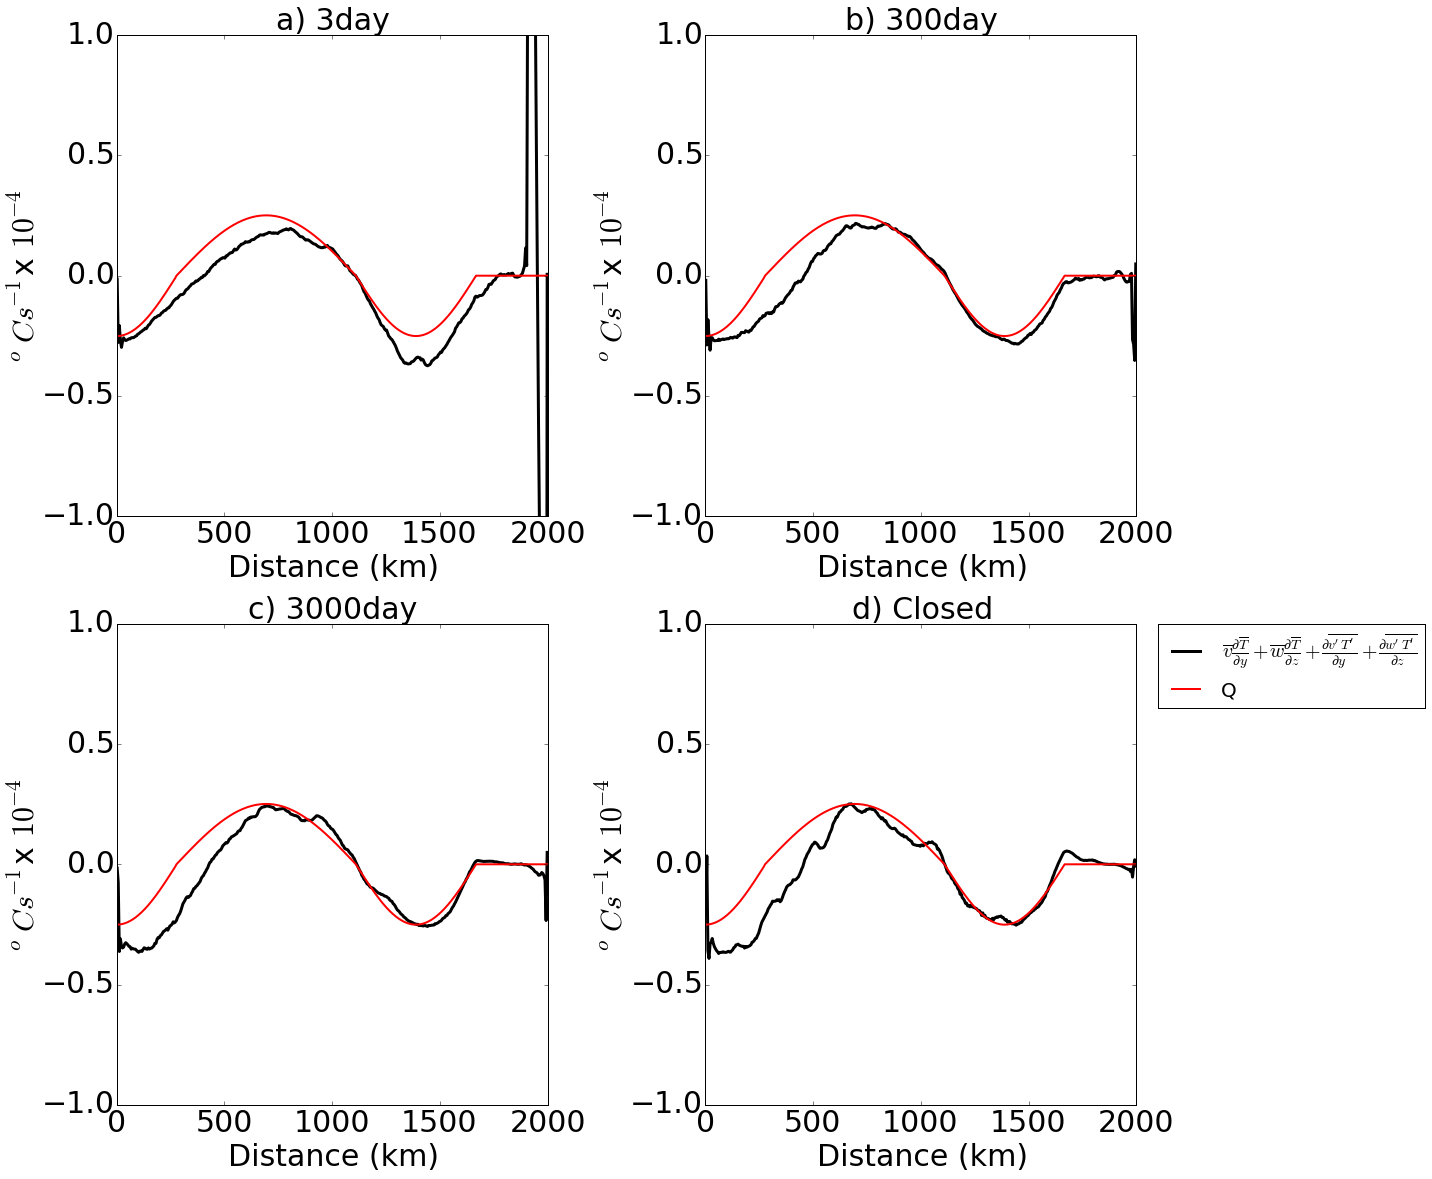

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                  
    # put everything on the C Grid                                                  
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    Diff = (VTy+WTz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,Diff*10**5,'k',linewidth=3)
    p = plt.plot(c.yc/1000,Psipred*10**5,'r',linewidth=2)
    plt.ylim(-1,1)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\overline{v}\frac{\partial \overline{T}}{\partial y} + \overline{w}\frac{\partial \overline{T}}{\partial z} + \frac{\partial \overline{v^\prime T^\prime}}{\partial y} + \frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\frac{\partial\overline{v} \overline{T}}{\partial y} + \frac{\partial\overline{w} \overline{T}}{\partial z} + \frac{\partial \overline{v'T'}}{\partial y} + \frac{\partial \overline{w'T'}}{\partial z}  = Q + Diff
\end{equation}

In [148]:
########## TEST #########
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTdy = (np.gradient(V.mean(axis=2)*Tbar,c.dyg,edge_order=2)[1]*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdy = (np.gradient(W.mean(axis=2)*Tbar,c.dzf,edge_order=2))[0]#[0]*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (np.gradient(VpTp,c.dyg,edge_order=2)[1]*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (np.gradient(WpTp,c.dzf,edge_order=2)[0]*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,Diff*10**5,'k',linewidth=3)
    p = plt.plot(c.yc/1000,Psipred*10**5,'r',linewidth=2)
    plt.ylim(-1,1)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\frac{\partial \overline{v} \overline{T}}{\partial y} + \frac{\partial \overline{w} \overline{T}}{\partial z} + \frac{\partial \overline{v^\prime T^\prime}}{\partial y} + \frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in divide


ValueError: operands could not be broadcast together with shapes (30,400) (30,) (30,400) 

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


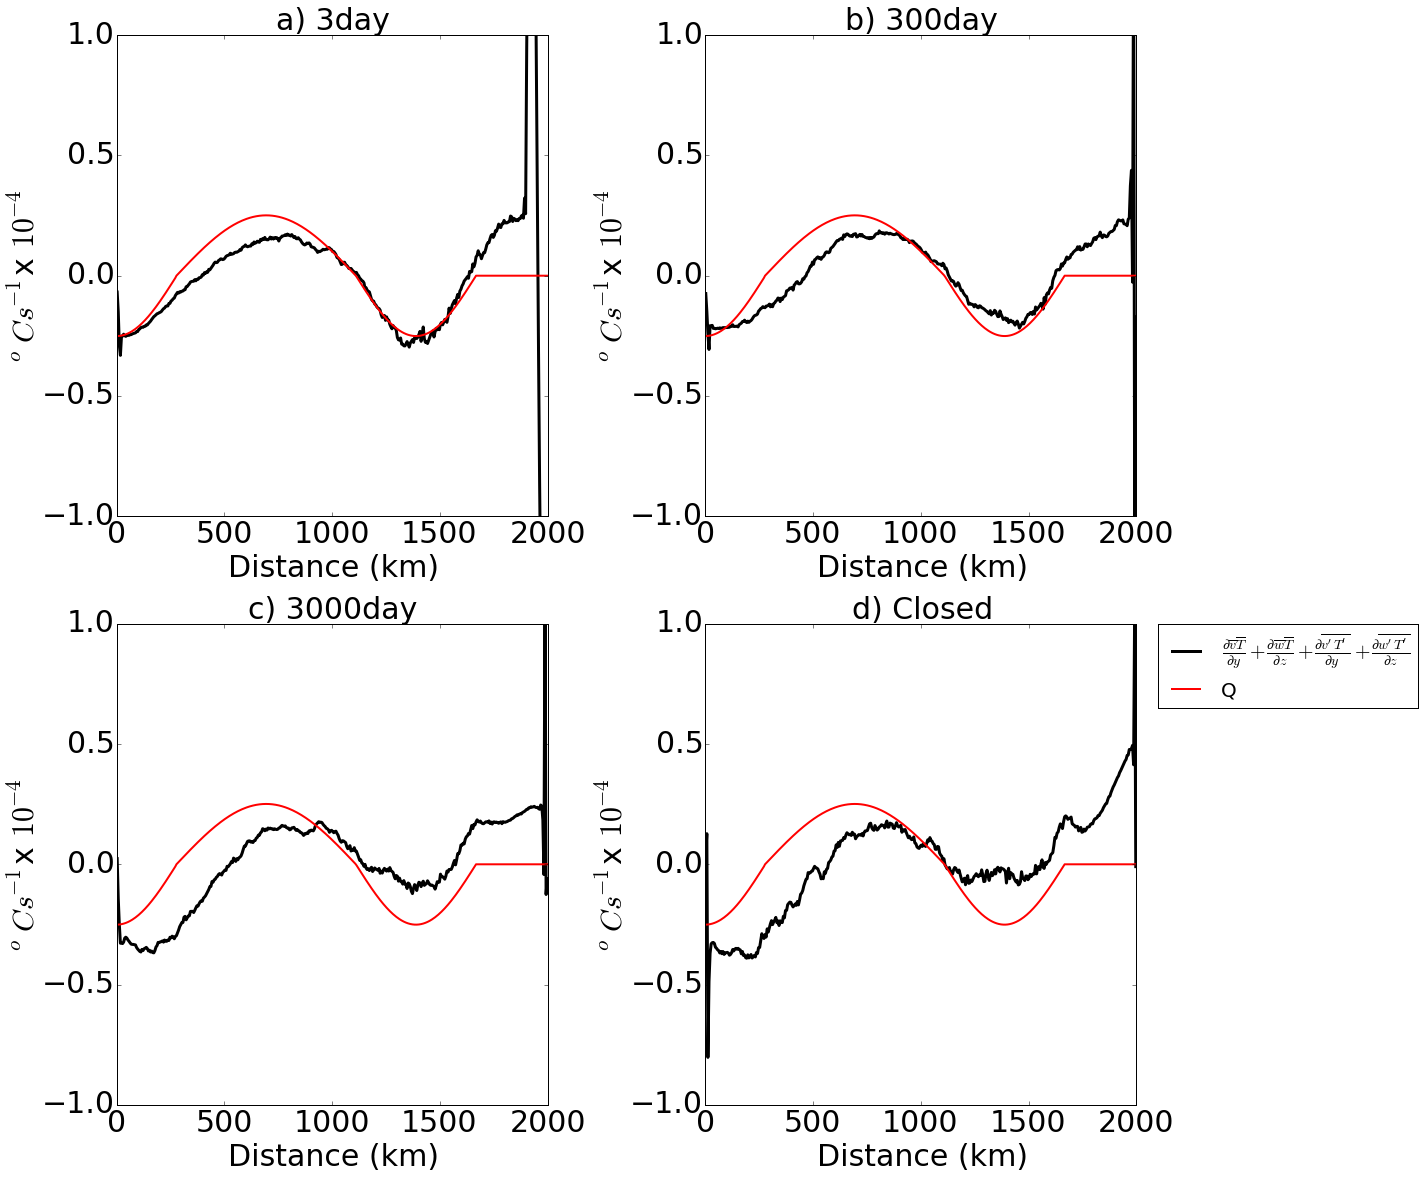

In [7]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,Diff*10**5,'k',linewidth=3)
    p = plt.plot(c.yc/1000,Psipred*10**5,'r',linewidth=2)
    plt.ylim(-1,1)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\frac{\partial \overline{v} \overline{T}}{\partial y} + \frac{\partial \overline{w} \overline{T}}{\partial z} + \frac{\partial \overline{v^\prime T^\prime}}{\partial y} + \frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\frac{\partial \overline{vT}}{\partial y} + \frac{\partial\overline{wT}}{\partial z}  = Q + Diff
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


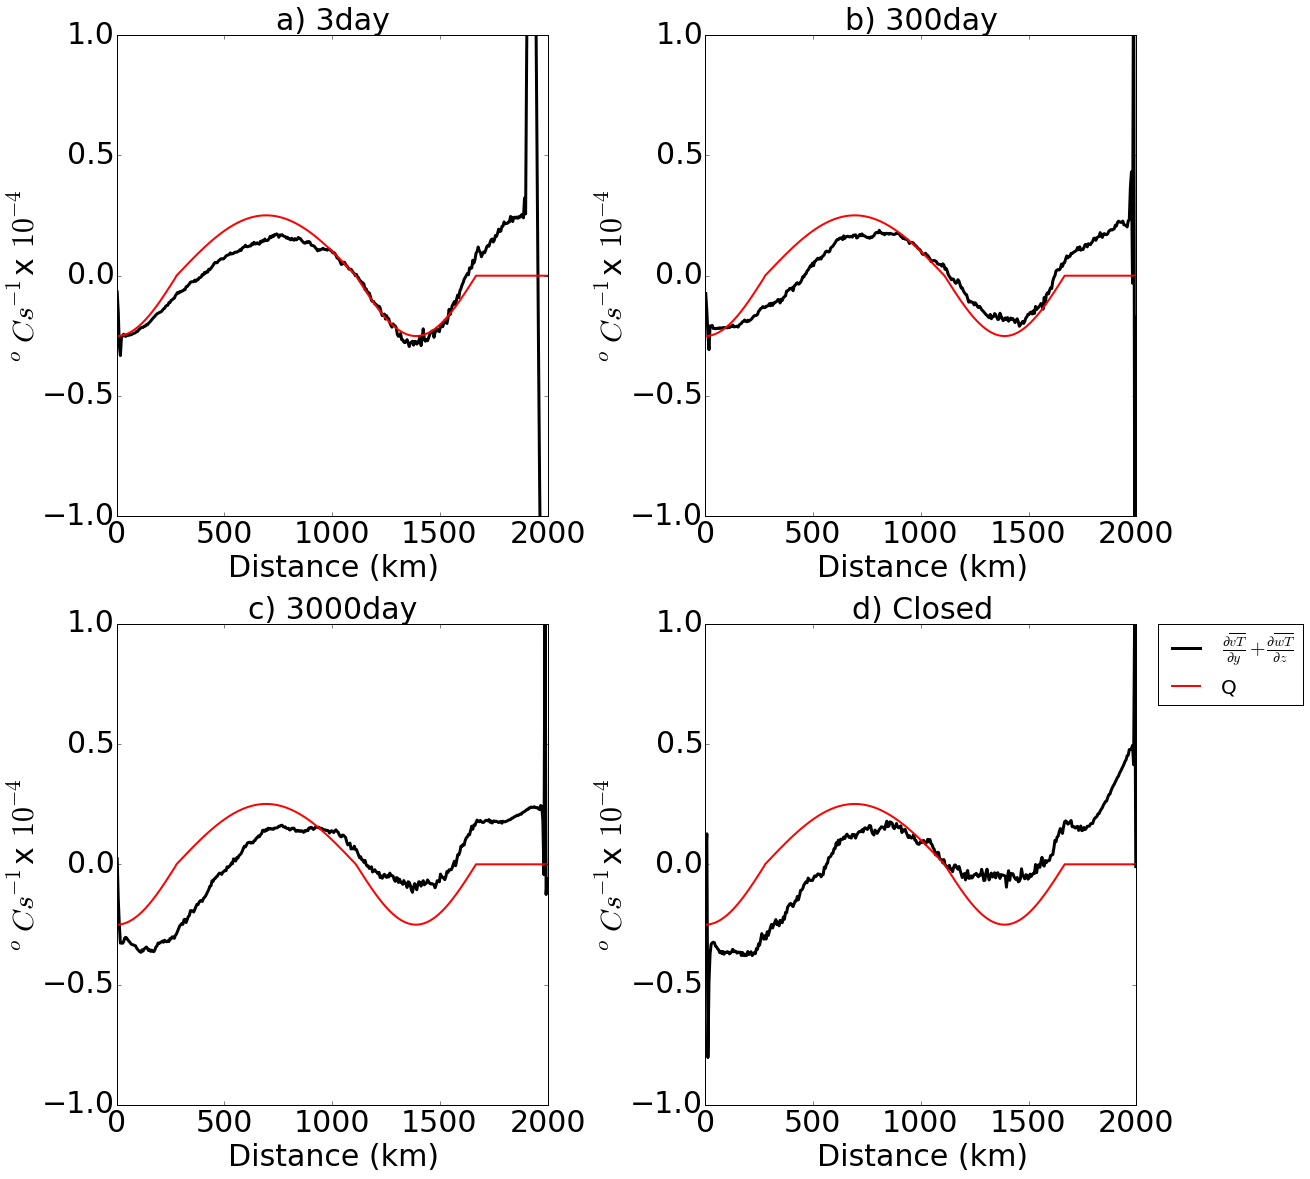

In [8]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))#.mean(axis=2)
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))#.mean(axis=2)

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(VT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(WT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    Diff = (VTdy+WTdz)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,Diff*10**5,'k',linewidth=3)
    p = plt.plot(c.yc/1000,Psipred*10**5,'r',linewidth=2)
    plt.ylim(-1,1)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\frac{\partial  \overline{vT}}{\partial y} + \frac{\partial  \overline{wT}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


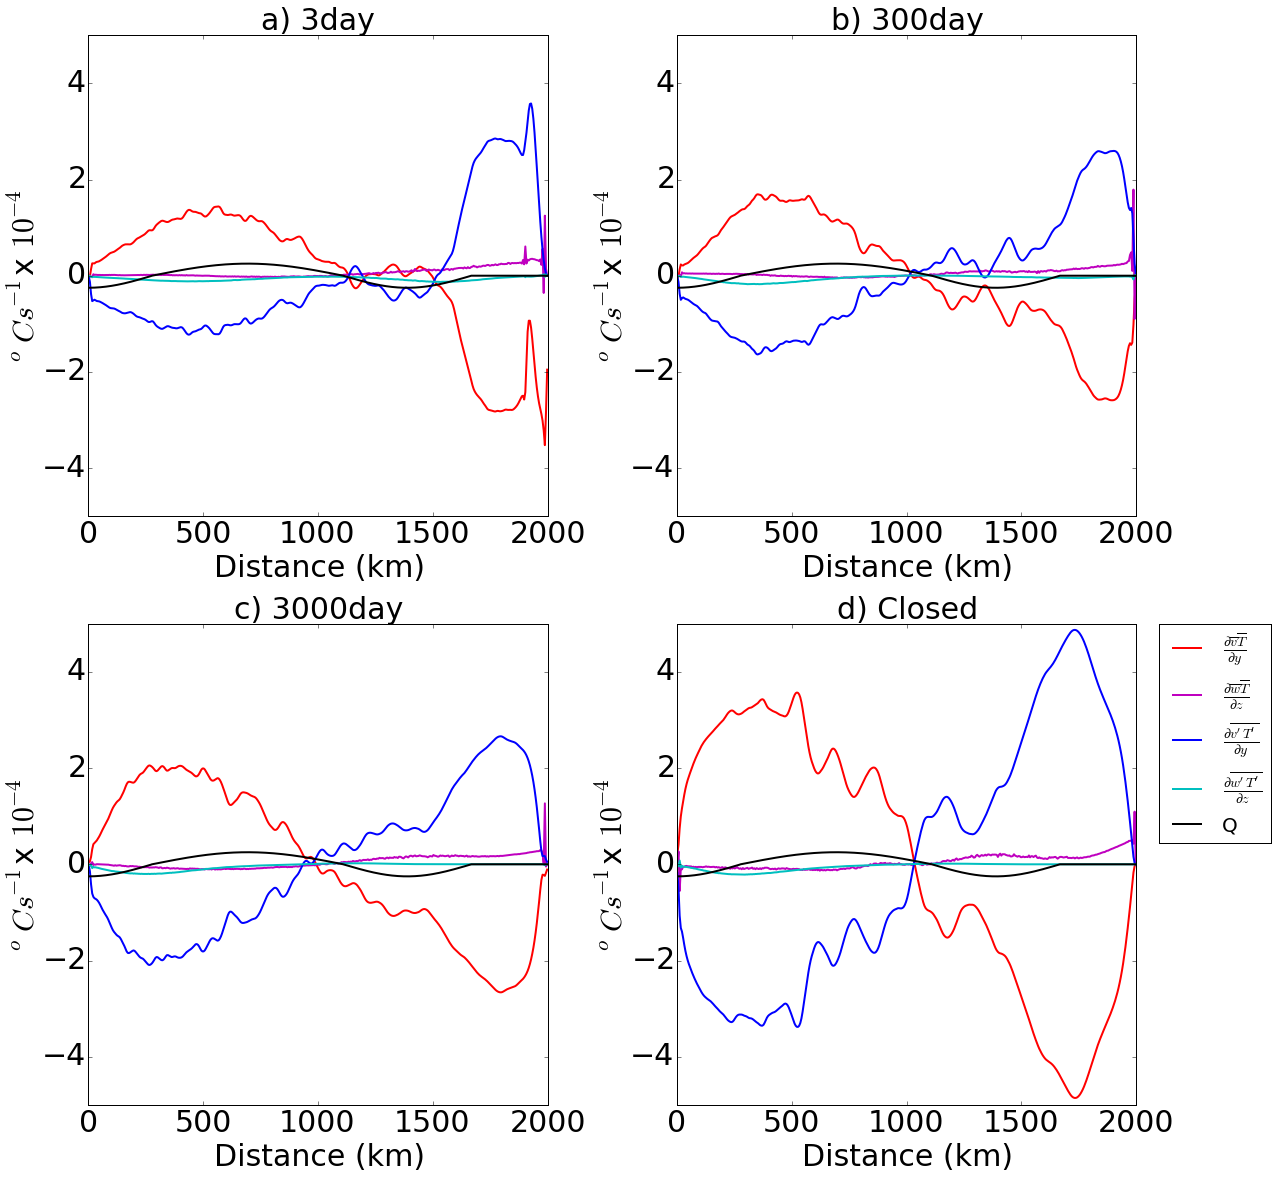

In [150]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    #VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,VTy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,WTz*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,VpTpy*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,WpTpz*10**5,'c',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\frac{\partial\overline{v} \overline{T}}{\partial y}$',r'$\frac{\partial \overline{w} \overline{T}}{\partial z}$',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


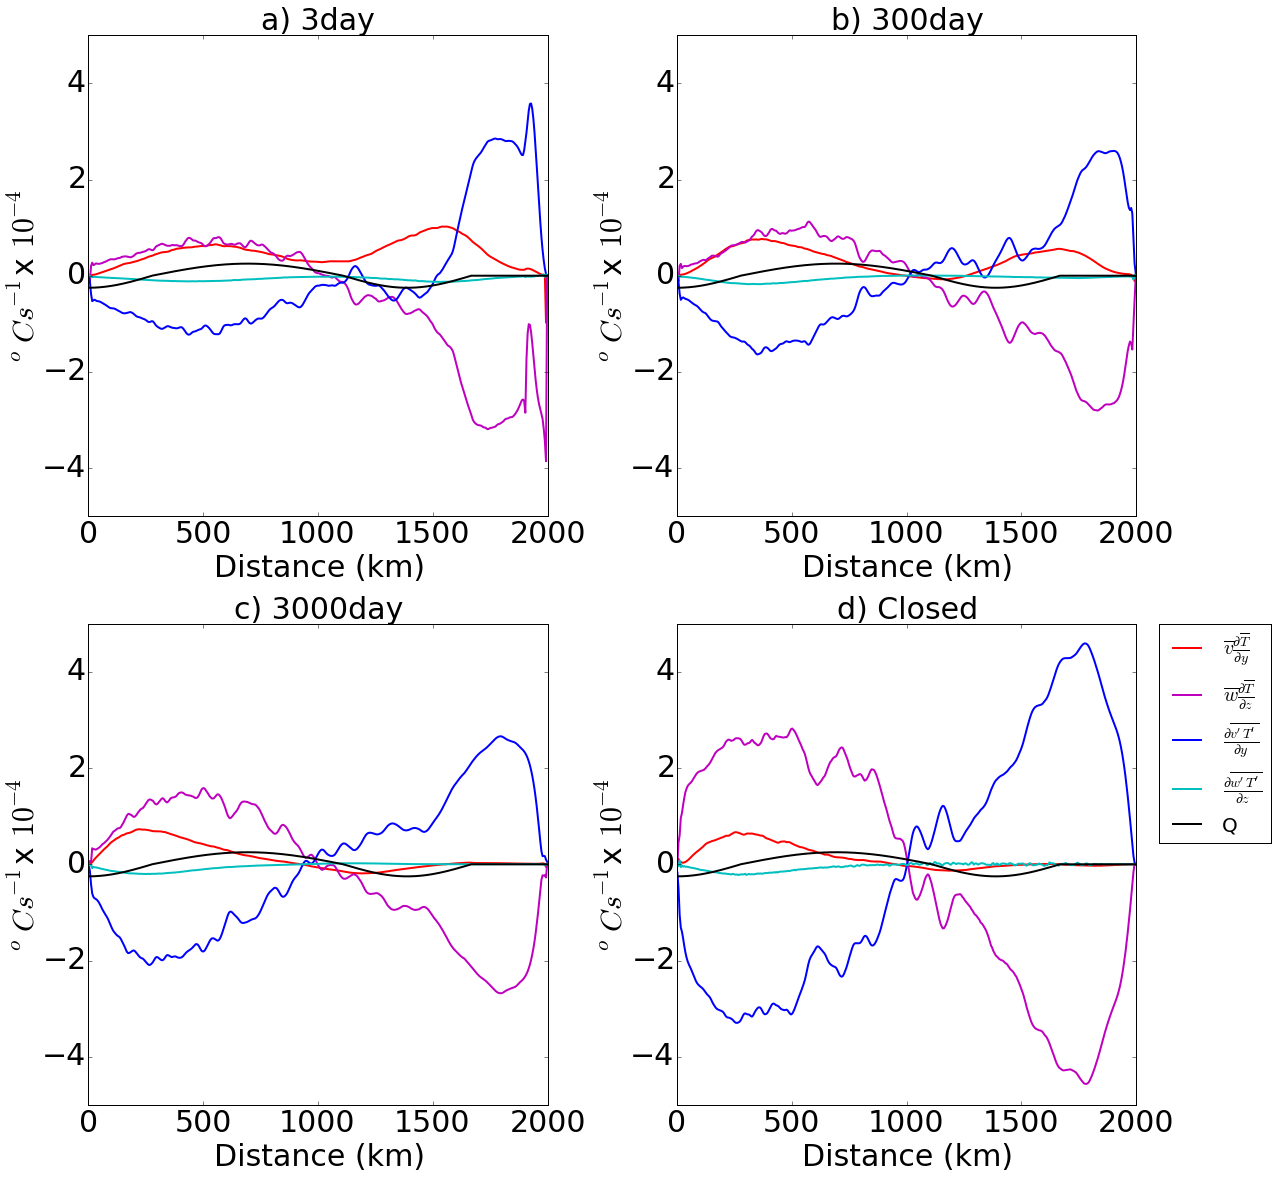

In [137]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,VTy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,WTz*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,VpTpy*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,WpTpz*10**5,'c',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\overline{v}\frac{\partial \overline{T}}{\partial y}$',r'$\overline{w}\frac{\partial \overline{T}}{\partial z}$',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


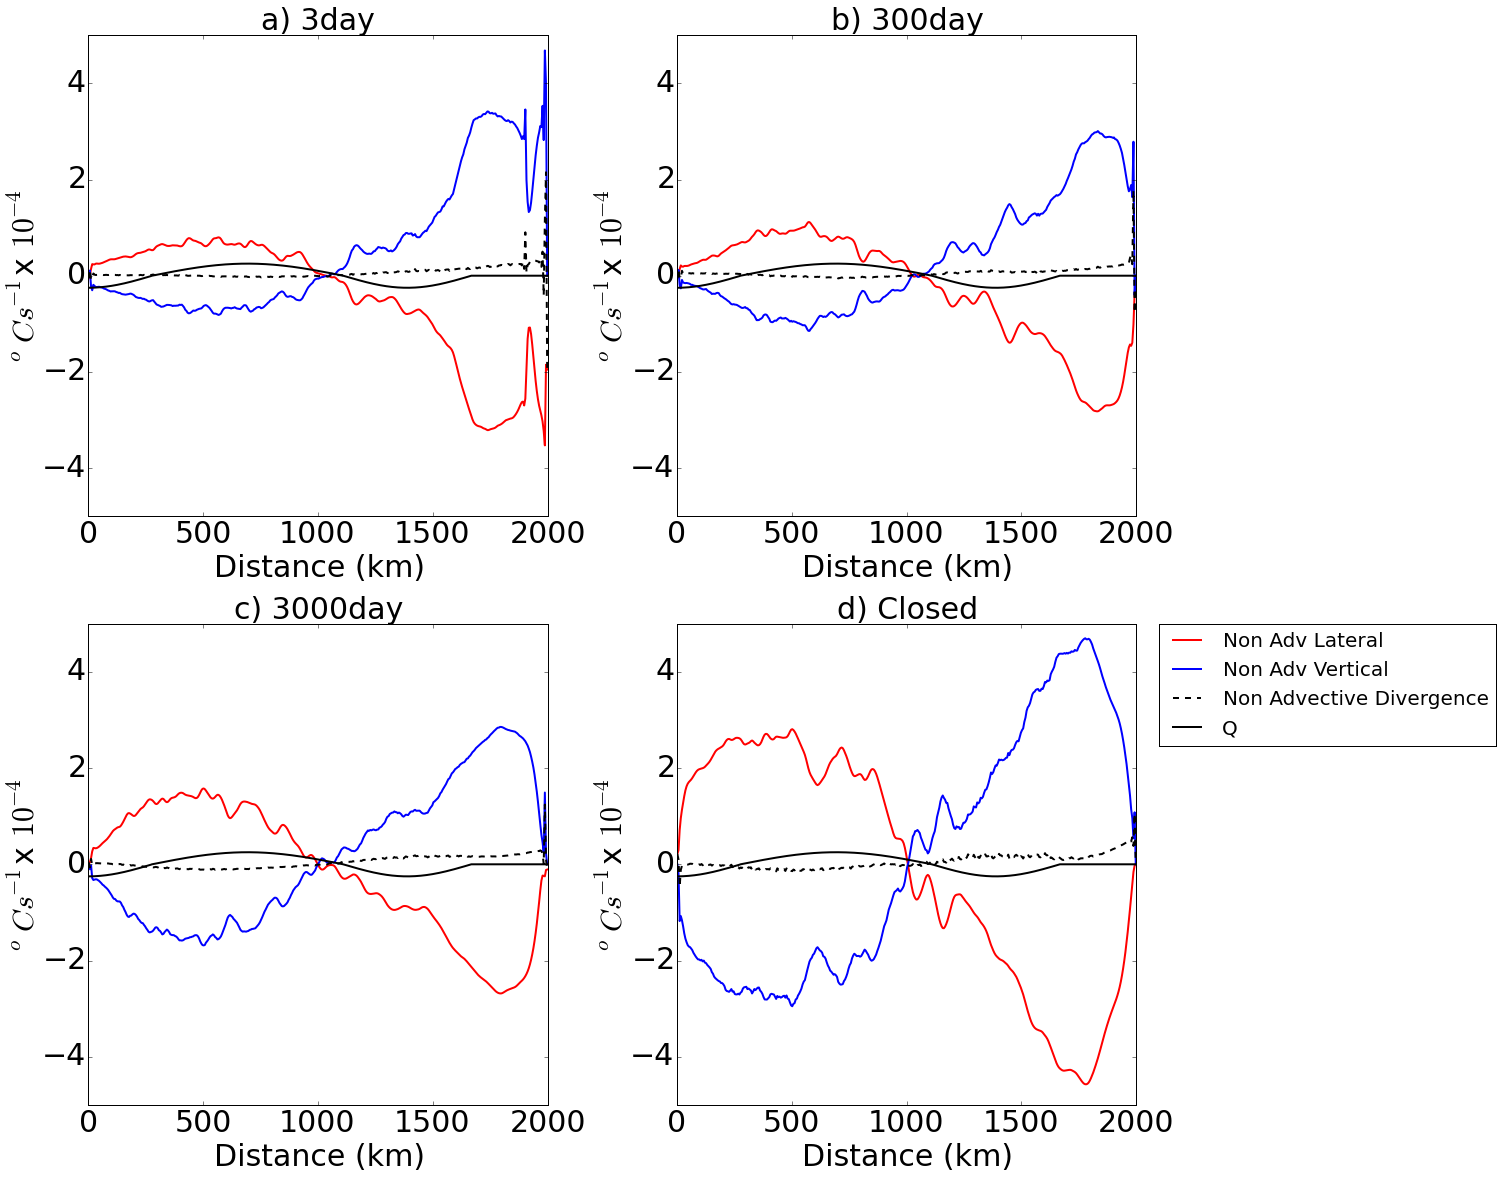

In [138]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,(VTdy -VTy)*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,(WTdz -WTz)*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,((VTdy -VTy)+(WTdz -WTz))*10**5,'--k',linewidth=2)
    #p = plt.plot(c.yc/1000,WTdz*10**5,'--b',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'Non Adv Lateral',r'Non Adv Vertical',
                r'Non Advective Divergence',
                'Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\left( \frac{\partial \overline{vT}}{\partial y } - \frac{\partial \overline{v}  \overline{T}}{\partial y } , \frac{\partial\overline{wT}}{\partial z }  - \frac{\partial  \overline{w} \overline{T}}{\partial z } \right) = \left(\frac{\partial   \overline{v'T'}}{\partial y },\frac{\partial   \overline{w'T'}}{\partial z }\right)
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


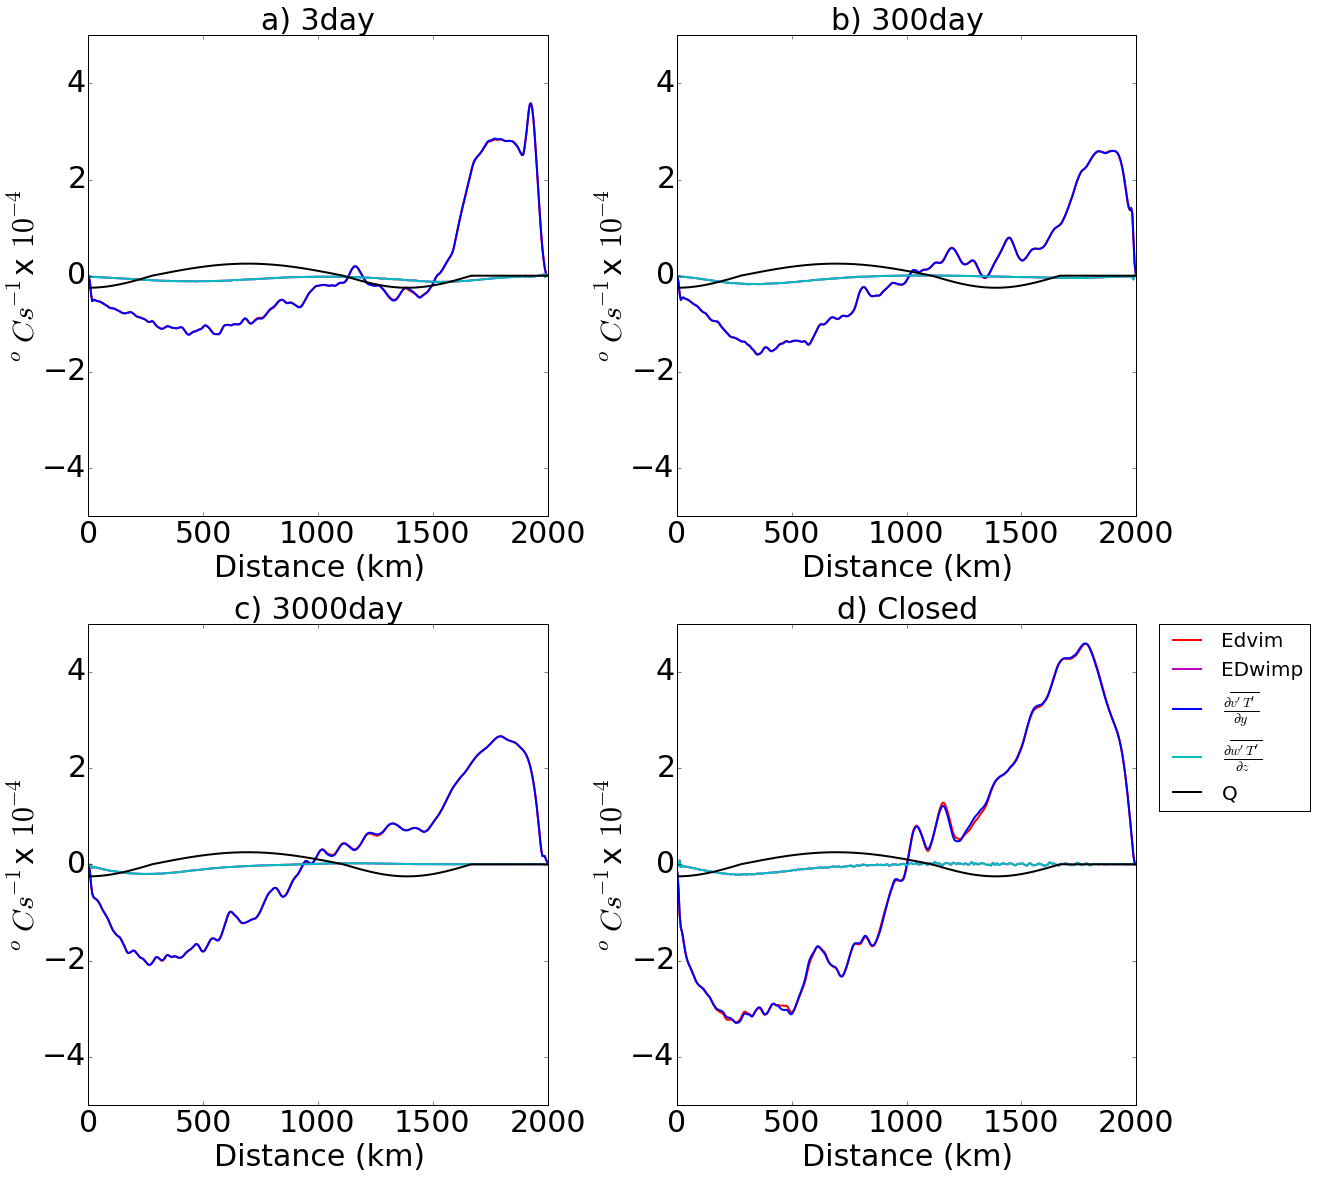

In [139]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    #VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (c.ddz_cgrid_centered(WT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTy = (c.ddy_cgrid_centered(VT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTedy =  VTy - VTdy 
    WTedz = WTz - WTdz
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,VTedy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,WTedz*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,VpTpy*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,WpTpz*10**5,'c',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'Edvim',r'EDwimp',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\left( \frac{\partial \overline{vT}}{\partial y } - \overline{v} \frac{\partial  \overline{T}}{\partial y } , \frac{\partial\overline{wT}}{\partial z }  -  \overline{w} \frac{\partial \overline{T}}{\partial z } \right) = \left(\frac{\partial   \overline{v'T'}}{\partial y },\frac{\partial   \overline{w'T'}}{\partial z }\right)
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


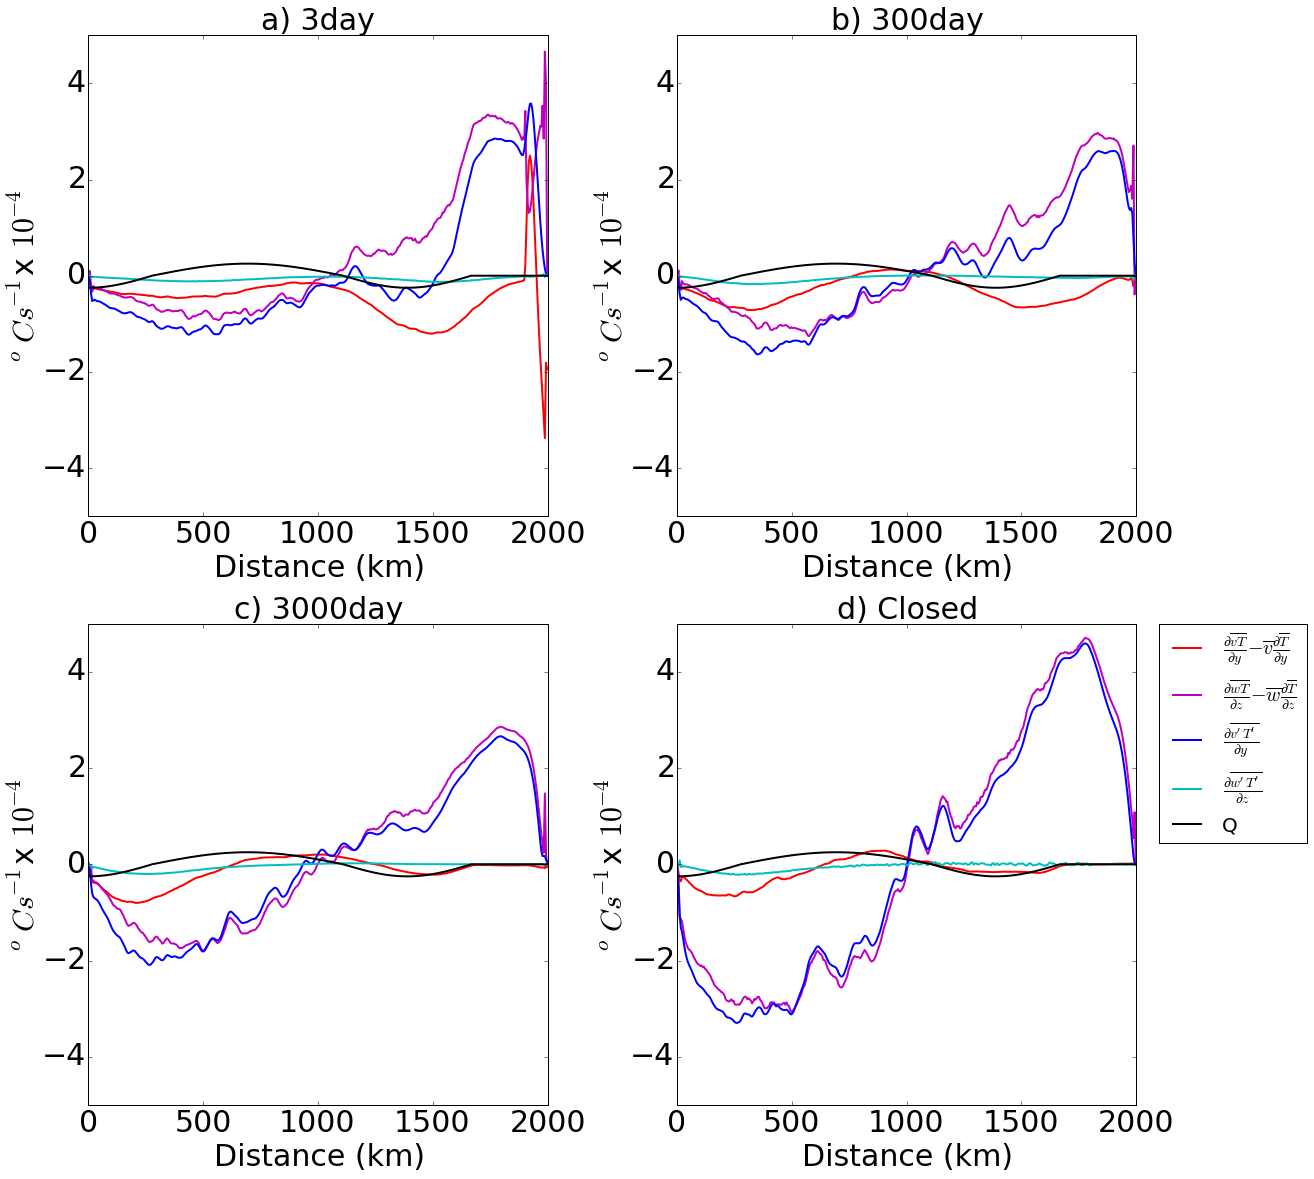

In [140]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTdy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (c.ddz_cgrid_centered(WT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTy = (c.ddy_cgrid_centered(VT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTedy =  VTy - VTdy 
    WTedz = WTz - WTdz
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,VTedy*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,WTedz*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,VpTpy*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,WpTpz*10**5,'c',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$\frac{\partial \overline{vT}}{\partial y}-\overline{v}\frac{\partial \overline{T}}{\partial y}$',
                r'$\frac{\partial \overline{wT}}{\partial z}-\overline{w}\frac{\partial \overline{T}}{\partial z}$',r'$\frac{\partial \overline{v^\prime T^\prime}}{\partial y}$',r'$\frac{\partial \overline{w^\prime T^\prime}}{\partial z}$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

1. No advective assumption, horizontal break down


\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial\overline{w} \overline{T}}{\partial z } + \frac{\partial \frac{\overline{w'T'}}{S_p}}{\partial y } + \frac{\partial \overline{w'T'}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{v'T'}-\frac{\overline{w'T'}}{S_p}\right)}{\partial y}
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


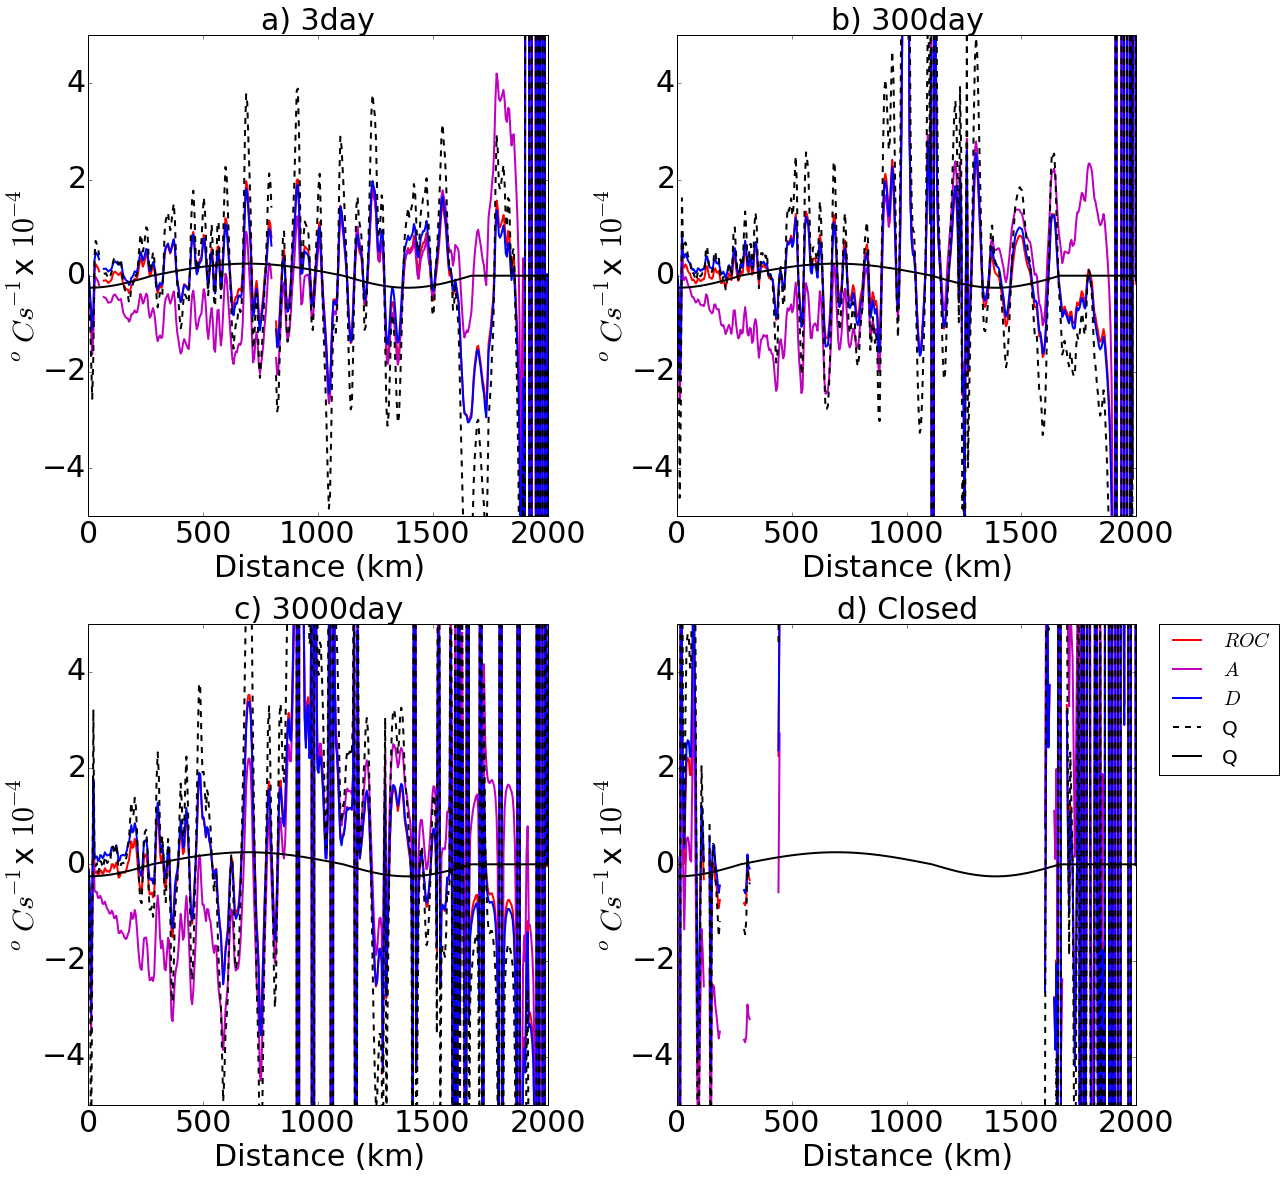

In [141]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    #VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    A = (c.ddy_cgrid_centered(WpTp/S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    D = - (c.ddy_cgrid_centered(VpTp-WpTp/S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    ROC = VTdy + WTdz + WpTpz + A
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,ROC*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,A*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,(ROC+D)*10**5,'--k',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$ROC$',r'$A$',r'$D$',r'Q','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial\overline{w} \overline{T}}{\partial z } + \frac{\partial \overline{v'T'}S_p}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


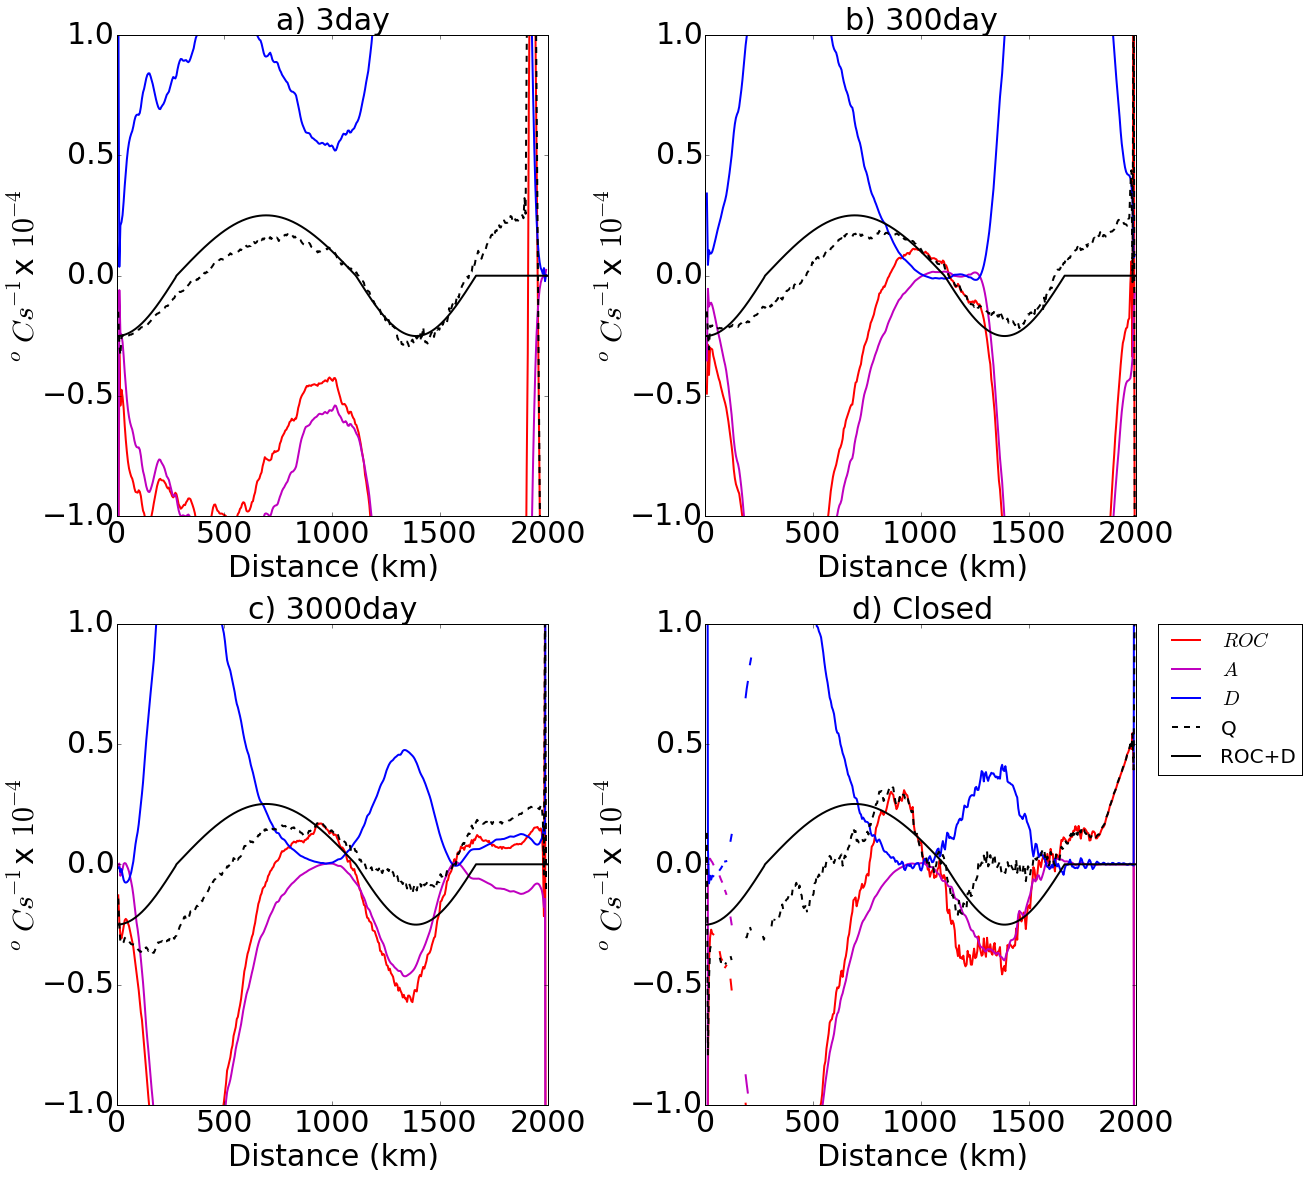

In [143]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    #VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    #WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTdy = (c.ddy_cgrid_centered(V.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = (c.ddz_cgrid_centered(W.mean(axis=2)*Tbar)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    A = (c.ddz_cgrid_centered(VpTp*S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    D = (c.ddz_cgrid_centered(WpTp-VpTp*S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    ROC = VTdy + WTdz + VpTpy + A
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,ROC*10**5,'r',linewidth=2)
    p = plt.plot(c.yc/1000,A*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,(ROC+D)*10**5,'--k',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-1,1)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$ROC$',r'$A$',r'$D$',r'Q','ROC+D'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\frac{\overline{v} \partial \overline{T}}{\partial y } +  \frac{\partial \frac{\overline{wT}}{S_p}}{\partial y } -\frac{\overline{w}}{S_p} \frac{\partial \overline{T}}{\partial z }+ \frac{\partial \overline{wT}}{\partial z }  = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{vT}-\frac{\overline{wT}}{S_p}\right)}{\partial y }-
\left(\overline{v}-\frac{\overline{w}}{S_p}\right)\frac{ \partial \overline{T}}{\partial y }.
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/l

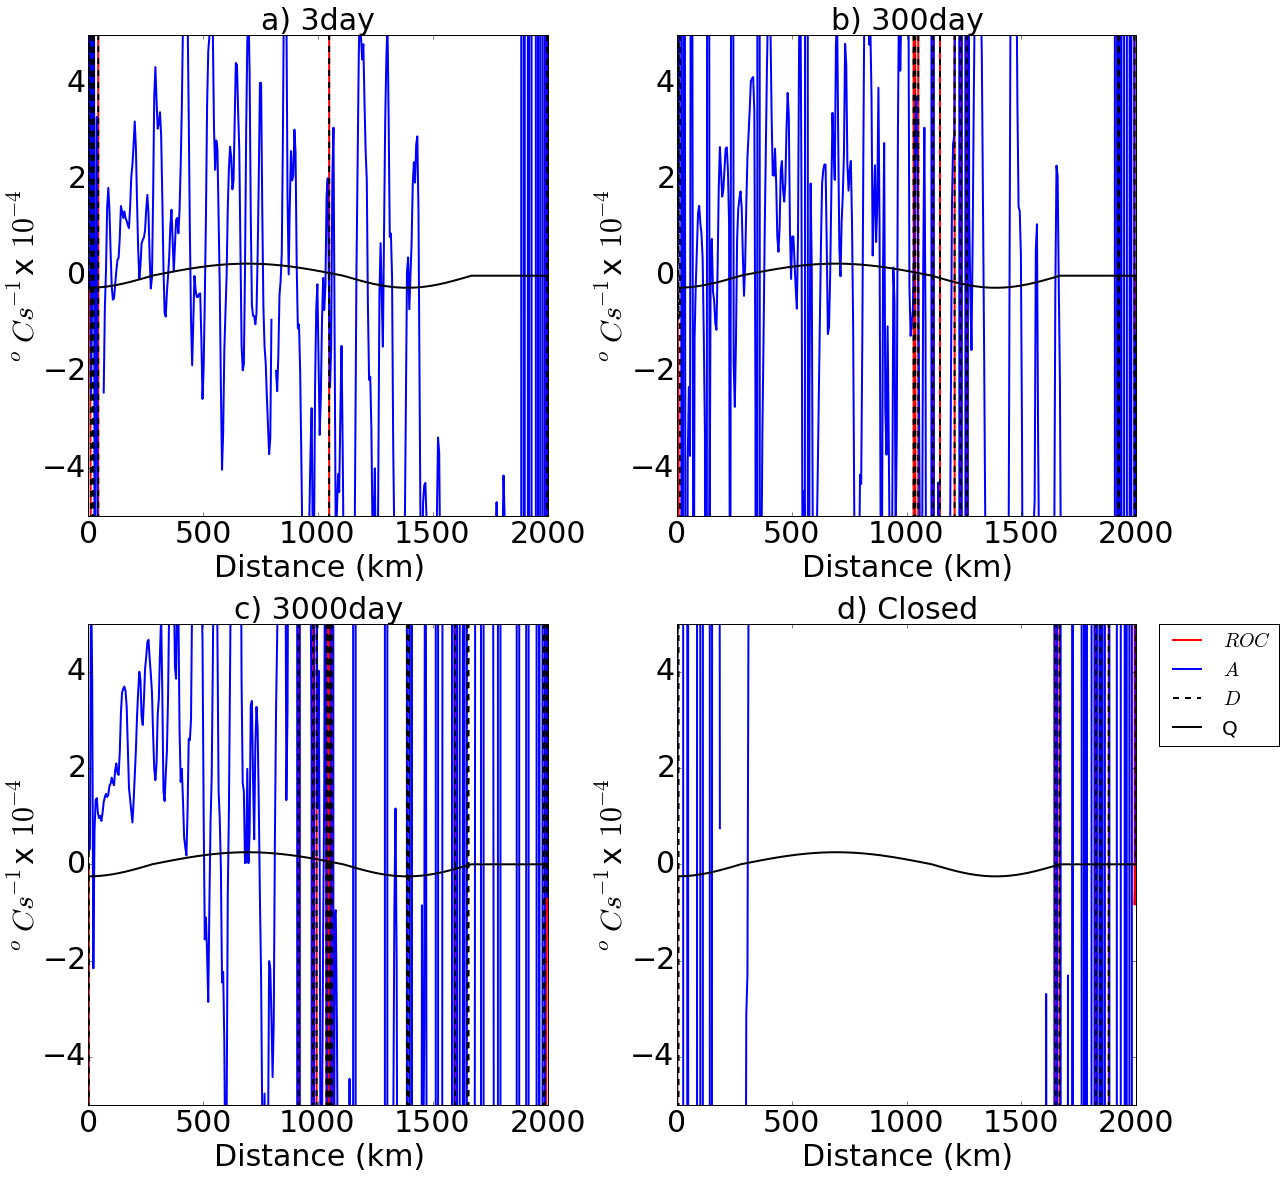

In [128]:
#### FINISH ###

fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTdy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = ((W.mean(axis=2)/S)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (c.ddz_cgrid_centered(WT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTy = (c.ddy_cgrid_centered(VT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WSTz = (c.ddz_cgrid_centered(WT.mean(axis=2)/S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTedy =  VTy - VTdy 
    WTedz = WTz - WTdz
    D = ((c.ddy_cgrid_centered(VT.mean(axis=2)-WT.mean(axis=2)/S)
          *tile(c.dzf,(c.Ny,1)).T).sum(axis=0)-
         ((V.mean(axis=2)-W.mean(axis=2)/S)*Ty).sum(axis=0))
    ROC = VTdy + WSTz + WTdz + WTz
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,ROC*10**5,'r',linewidth=2)
    #p = plt.plot(c.yc/1000,A*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,(ROC+D)*10**5,'--k',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$ROC$',r'$A$',r'$D$',r'Q','ROC+D'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
\frac{\overline{w}\partial \overline{T}}{\partial z } + \frac{\partial \overline{vT}}{\partial y } + \frac{\partial \overline{vT}S_p}{\partial z } - \frac{\overline{v}S_p \partial \overline{T}}{\partial z }= \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{wT}-\overline{vT}S_p \right)}{\partial z }-\frac{\left(\overline{w} -\overline{v}S_p \right)\partial \overline{T}}{\partial z }.
\end{equation}

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anacon

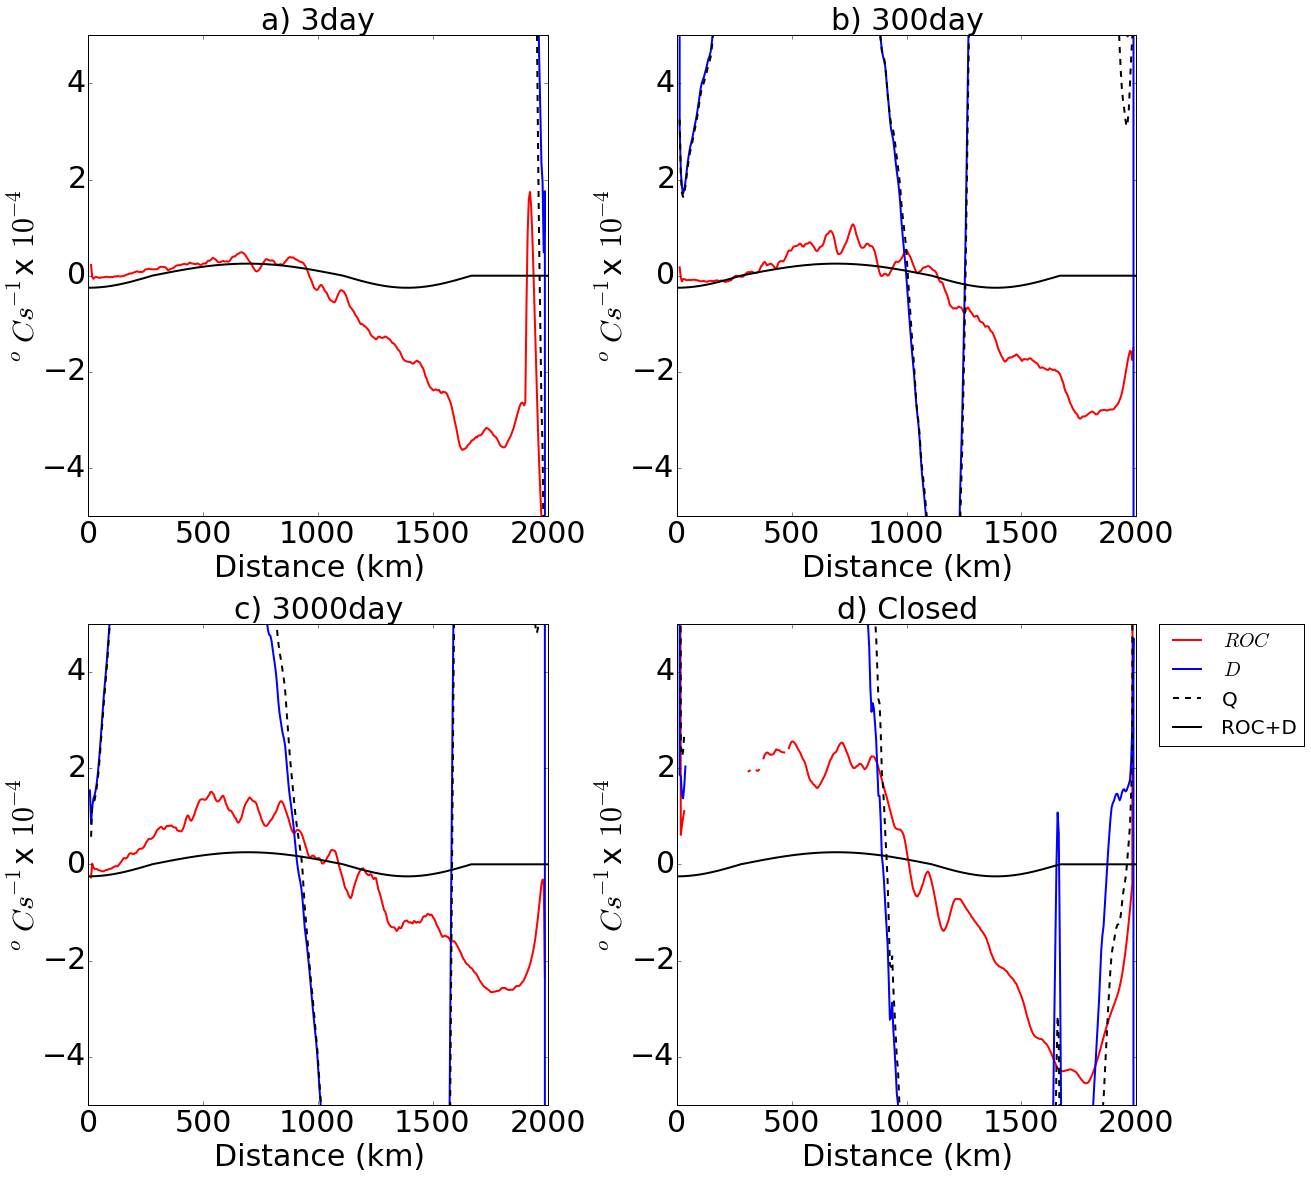

In [77]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTdy = ((V.mean(axis=2)*S)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTdz = ((W.mean(axis=2))*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (c.ddz_cgrid_centered(WT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTy = (c.ddy_cgrid_centered(VT.mean(axis=2))*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VSTy = (c.ddy_cgrid_centered(VT.mean(axis=2)*S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WSTz = (c.ddz_cgrid_centered(WT.mean(axis=2)/S)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VTedy =  VTy - VTdy 
    WTedz = WTz - WTdz
    D = ((c.ddz_cgrid_centered(WT.mean(axis=2)-VT.mean(axis=2)*S)
          *tile(c.dzf,(c.Ny,1)).T).sum(axis=0)-
         ((W.mean(axis=2)-V.mean(axis=2)*S)*Tz).sum(axis=0))
    ROC = WTdz  + VTy -VSTy + VTdy 
    Diff = (VTdy+WTdz+WpTpz+VpTpy)
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,ROC*10**5,'r',linewidth=2)
    #p = plt.plot(c.yc/1000,A*10**5,'m',linewidth=2)
    p = plt.plot(c.yc/1000,D*10**5,'b',linewidth=2)
    p = plt.plot(c.yc/1000,(ROC+D)*10**5,'--k',linewidth=2)
    p = plt.plot(c.yc/1000,Psipred*10**5,'k',linewidth=2)
    plt.ylim(-5,5)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$ROC$',r'$D$',r'Q','ROC+D'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

## Spatial variance in heat budget terms ##

**Ekman Transport Term:**

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/text.py:5

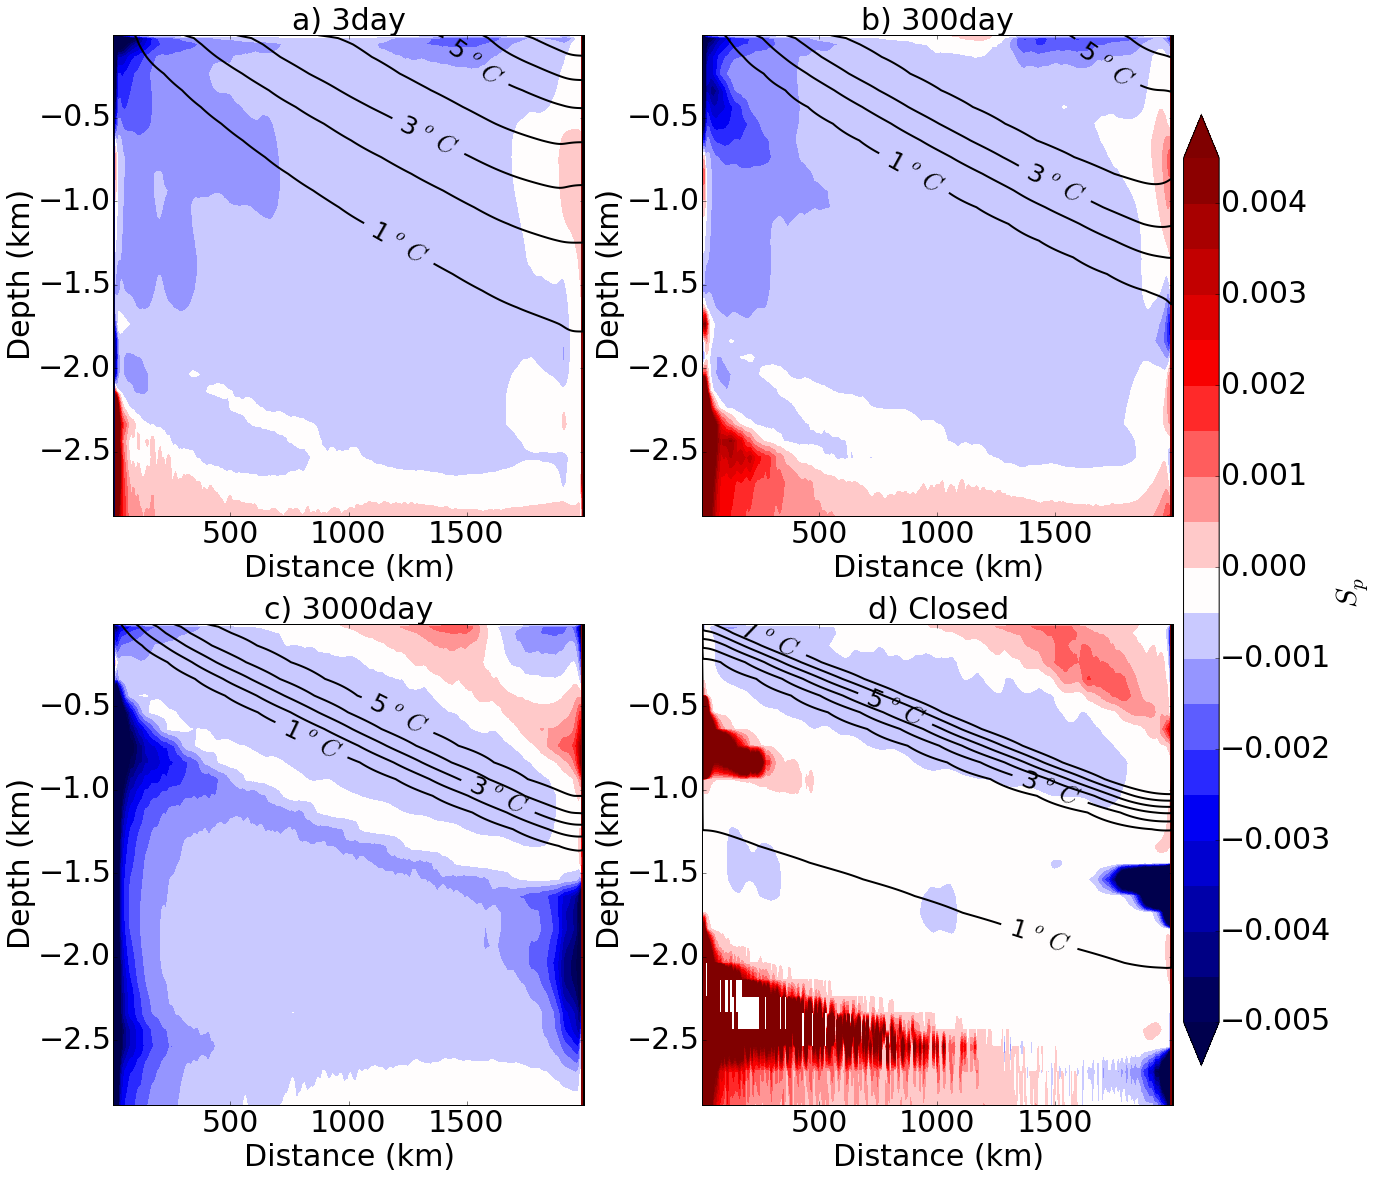

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1,1,0.1))/200
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
 
    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               S , Q_levs, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$S_p$ ', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


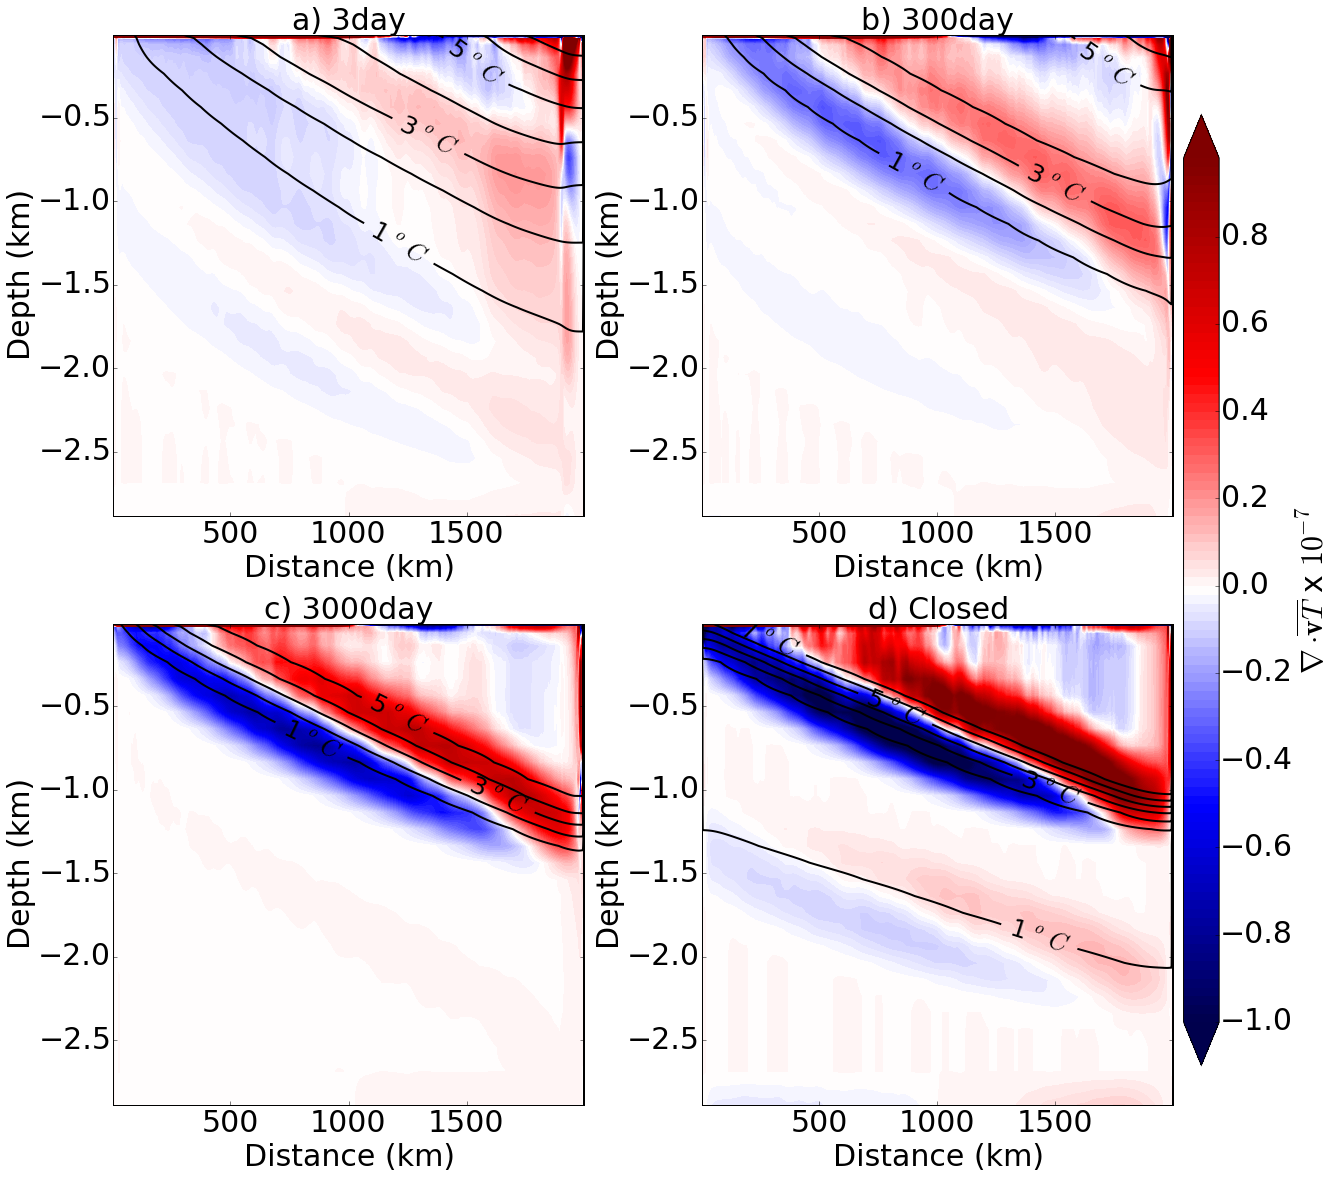

In [7]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1,1,0.02))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (c.ddy_cgrid_centered(VT.mean(axis=2)) )*10**7 , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{v} T}$ x $10^{-7}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


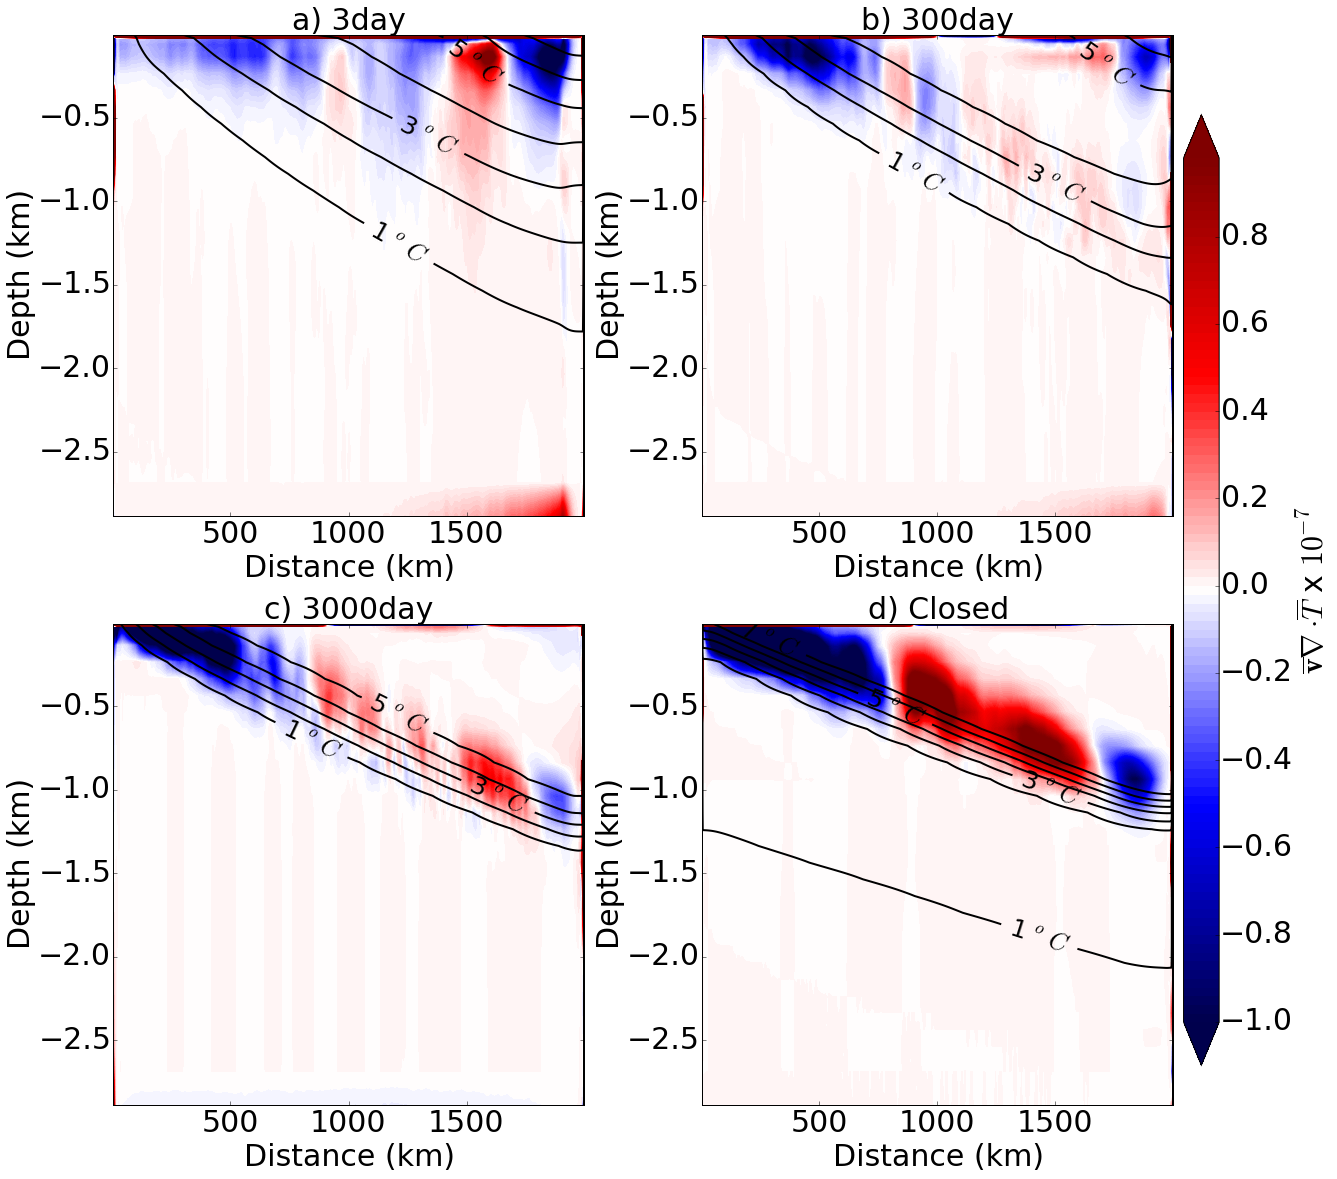

In [8]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1,1,0.02))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T)
    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (VTy )*10**7 , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\overline{\mathbf{v}} \nabla \cdot \overline{ T}$ x $10^{-7}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


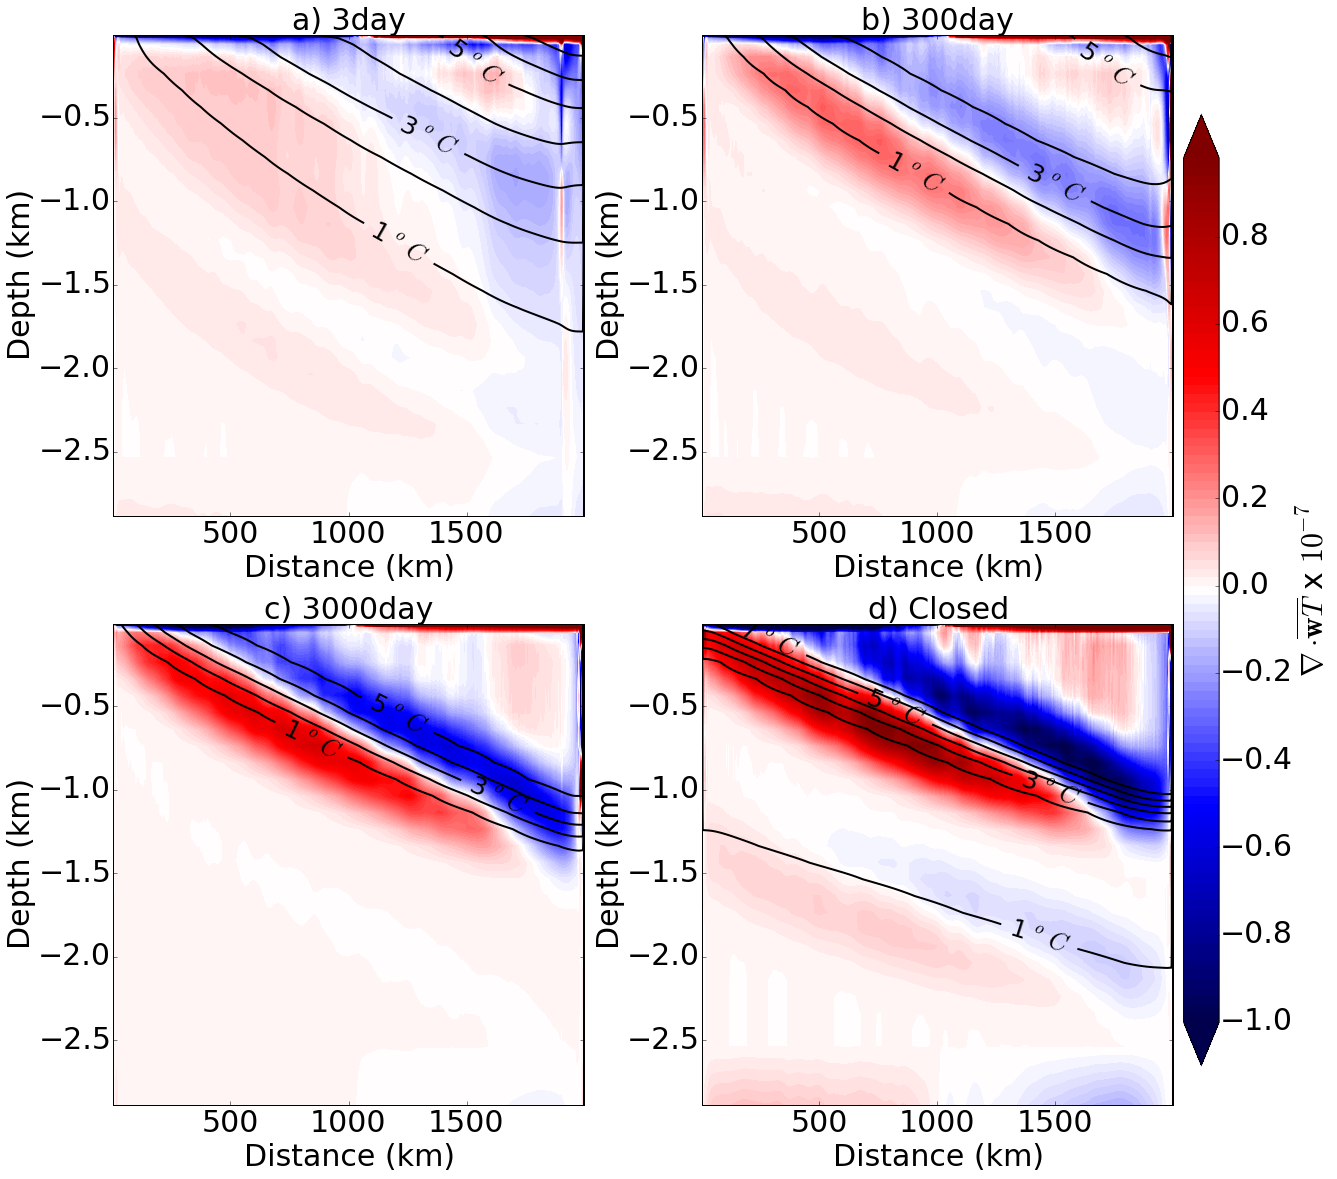

In [9]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1,1,0.02))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               ( c.ddz_cgrid_centered(WT.mean(axis=2)))*10**7 , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{w} T}$ x $10^{-7}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


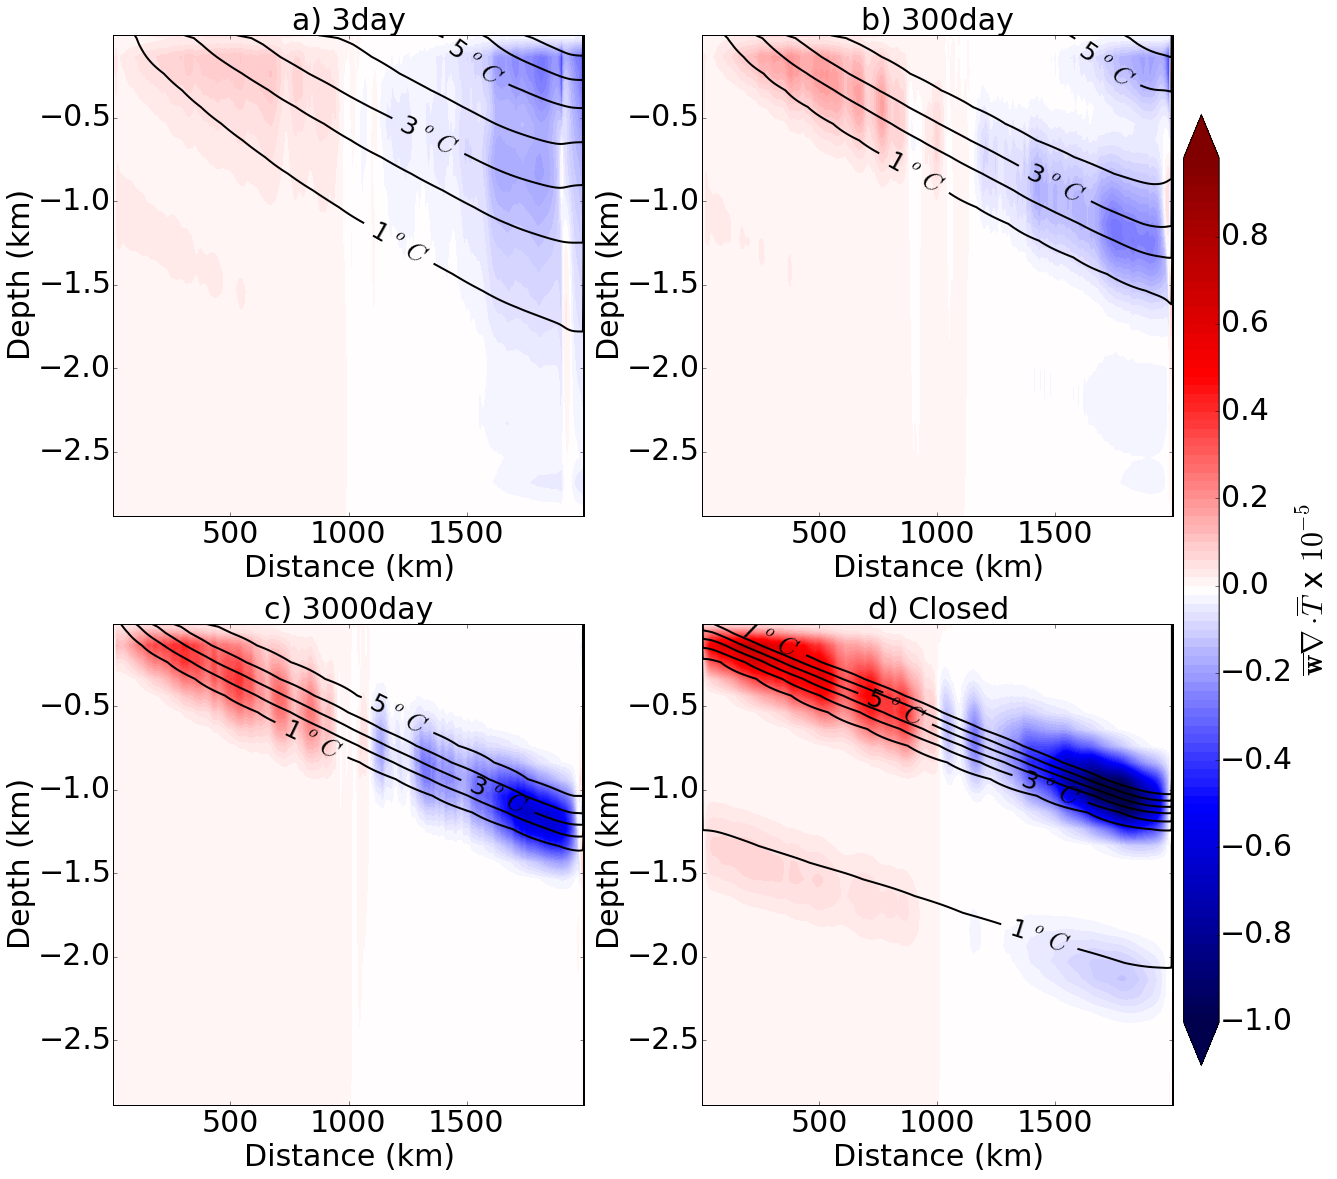

In [10]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1,1,0.02))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T)
    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               ( WTz)*10**5 , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\overline{\mathbf{w}}\nabla \cdot \overline{ T}$ x $10^{-5}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


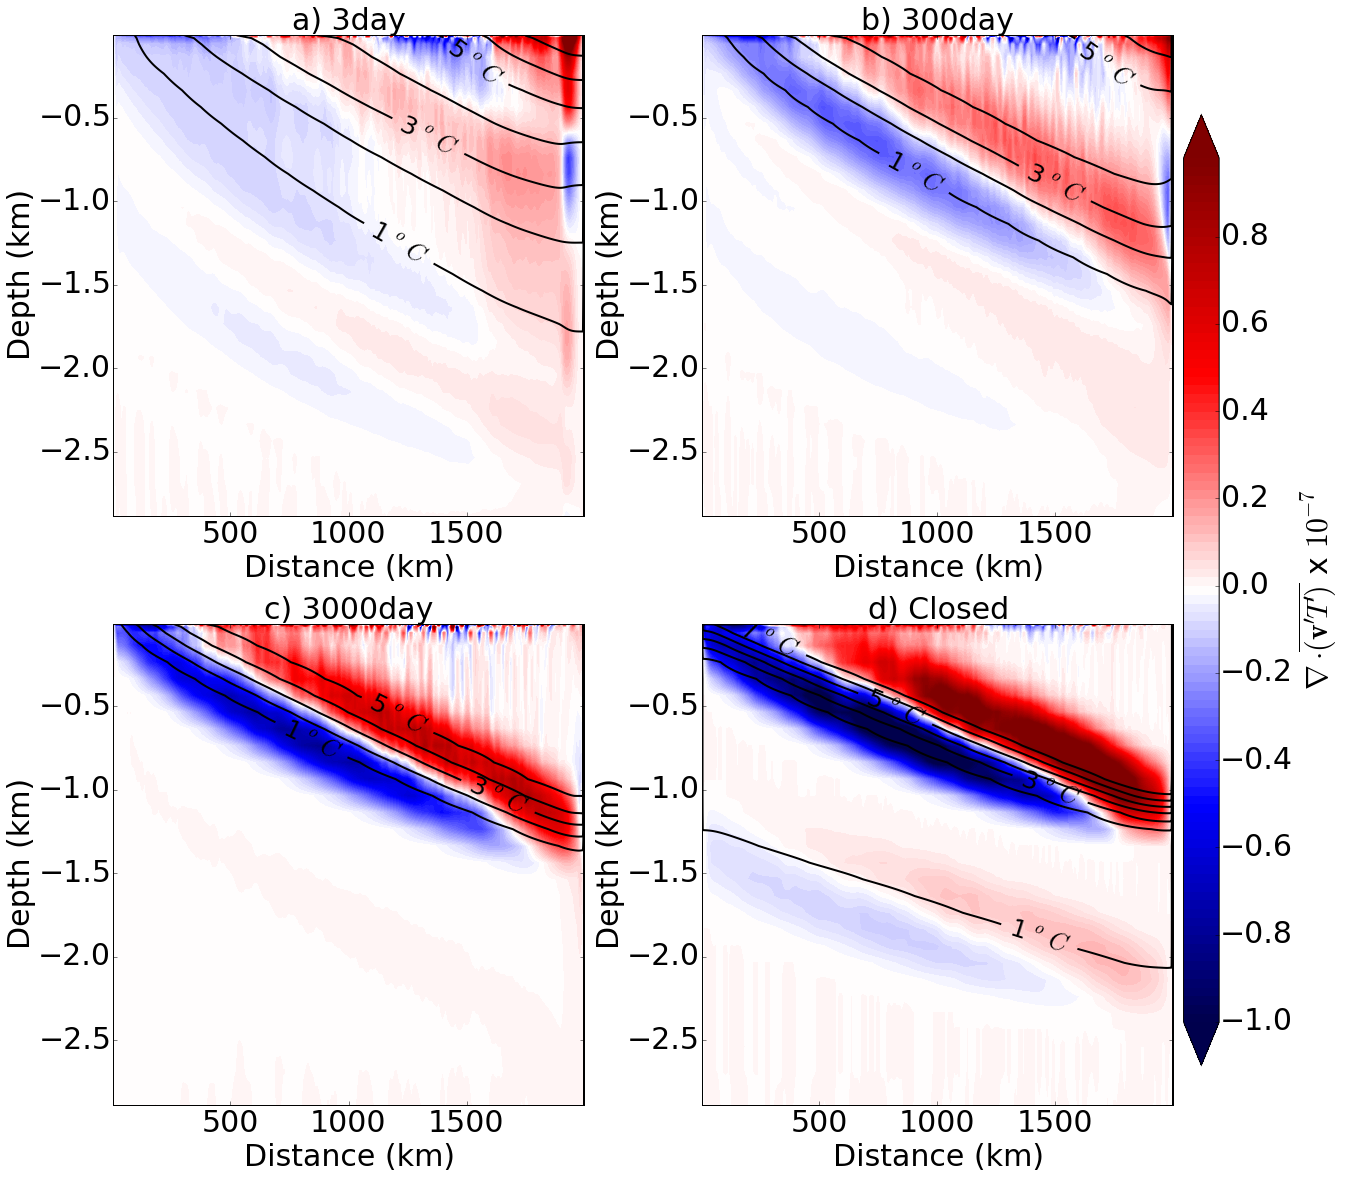

In [11]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))/10
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddy_cgrid_centered(VpTp) )*10**7, Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{v}' T')}$ x $10^{-7}$", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


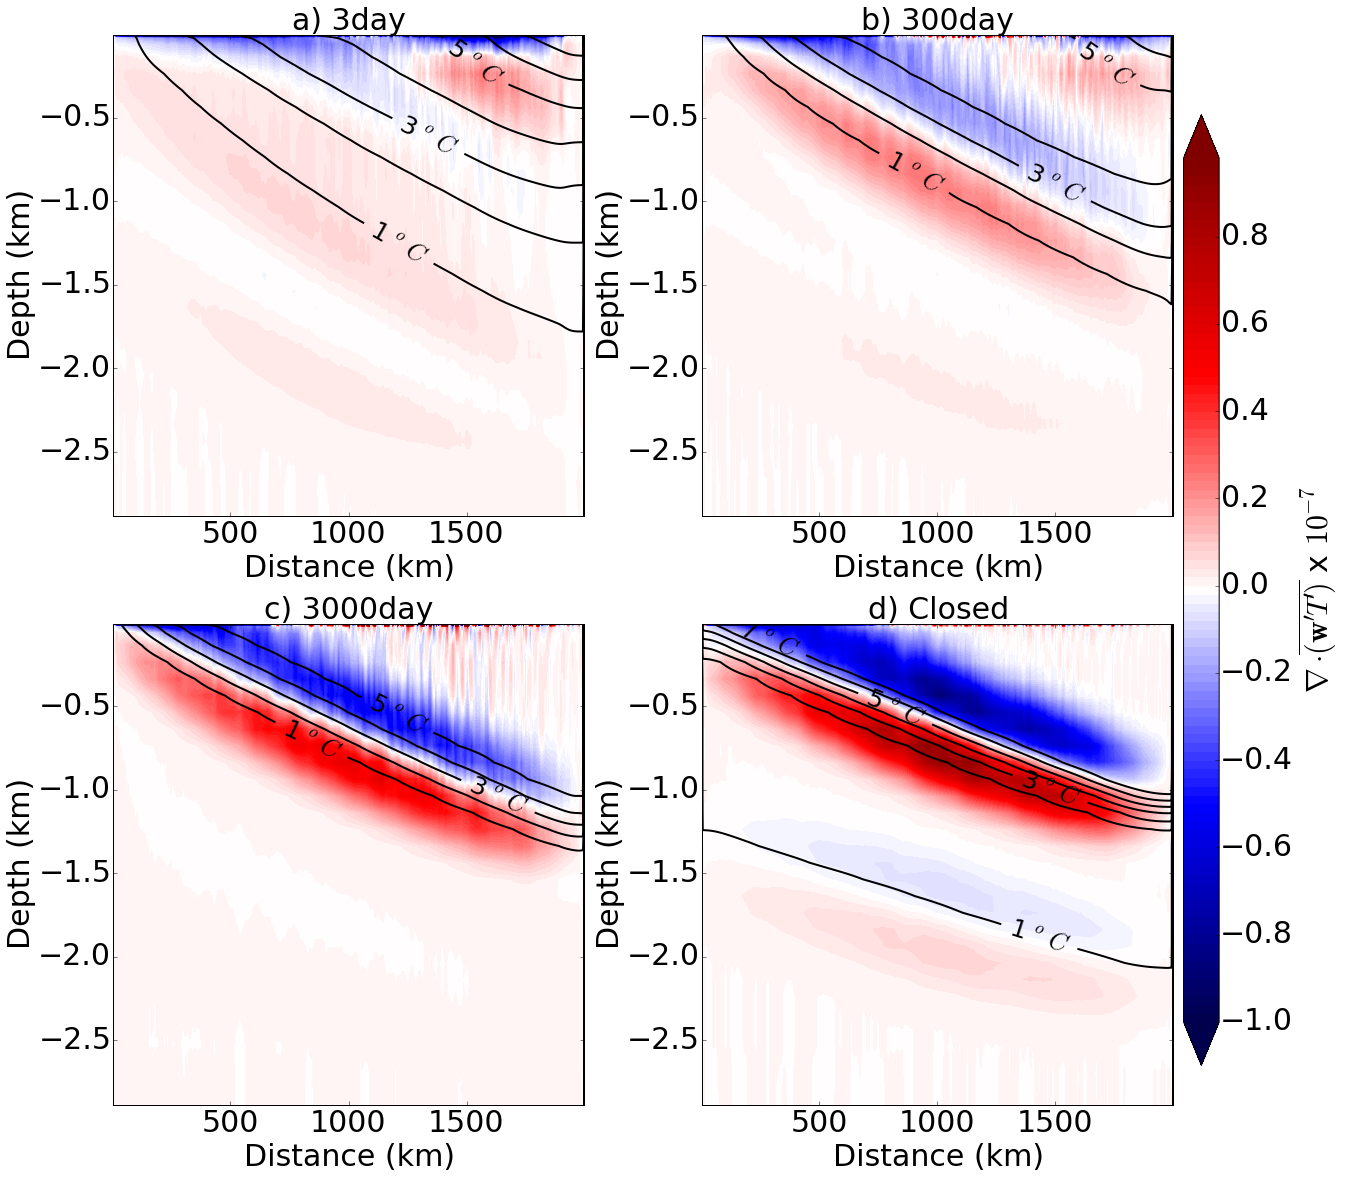

In [12]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))/10
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (c.ddz_cgrid_centered(WpTp) )*10**7, Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{w}' T')}$ x $10^{-7}$", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/Python/python_functions/MITgcmUtils/utils.py:213: RuntimeWarning: invalid value encountered in subtract
  out[:,1:Ny-1] = ma.divide((q[:,2::] - q[:,:Ny-2]) , (dyc[:,1:Ny-1] + dyc[:,3::]))
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:806: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: invalid value encountered in less
/noc/users/hb1g13/anaconda/lib/python2.

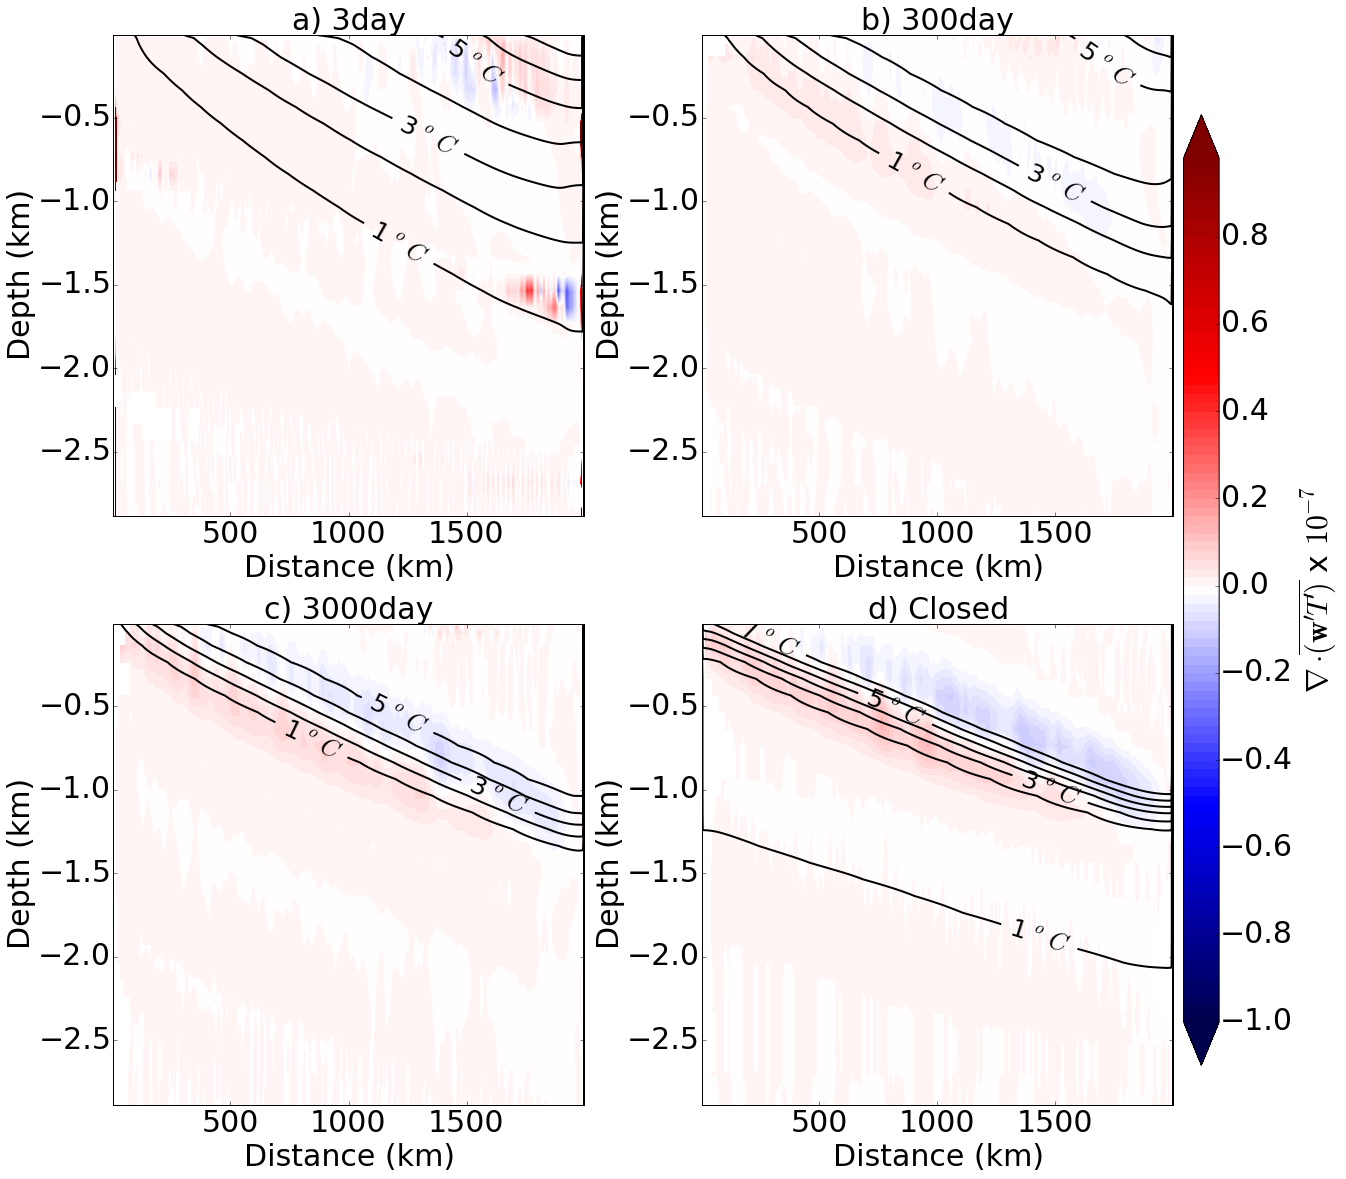

In [13]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-10,10,0.2))/10
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    A = (c.ddy_cgrid_centered(VpTp*S)*tile(c.dzf,(c.Ny,1)).T)
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4
    S[S>0.004]=np.nan
    S[S<-0.004]=np.nan
    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  (A)*10**7, Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{w}' T')}$ x $10^{-7}$", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


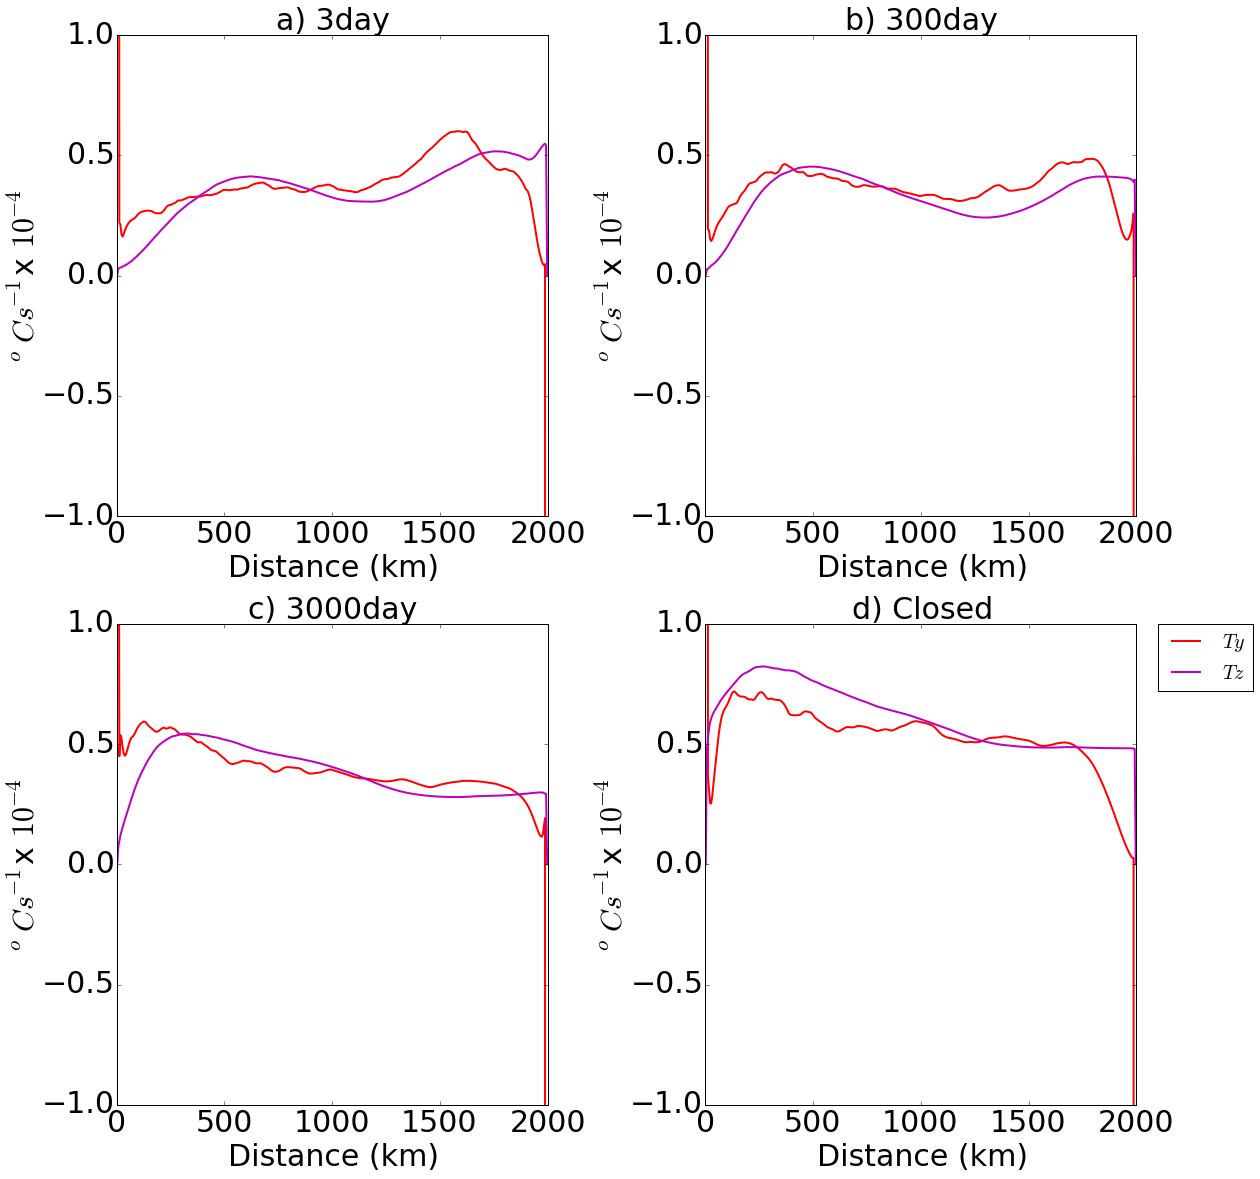

In [15]:
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    # mean zonal flow                                       
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    VTy = (V.mean(axis=2)*Ty*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WTz = (W.mean(axis=2)*Tz*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    VpTpy = (c.ddy_cgrid_centered(VpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    WpTpz = (c.ddz_cgrid_centered(WpTp)*tile(c.dzf,(c.Ny,1)).T).sum(axis=0)
    
    Ly = 2000e3
    Lx = 1000e3
    nx = np.round(Lx/5000)
    ny = np.round(Ly/5000)
    Q_0 = 10
    Q = np.zeros_like(c.yc)
    pi = math.pi
    Q=np.zeros(np.shape(Q))
    Q[0:int(5*ny/36)] = Q_0*(np.cos(c.yc[0:int(5*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Q[int(5*ny/36):int(20*ny/36)] = -Q_0*(np.sin((c.yc[int(5*ny/36):int(20*ny/36)]-c.yc[int(5*ny/36)])*(pi/(c.yc[int(15*ny/36)]))))
    Q[int(20*ny/36):int(30*ny/36)] = Q_0*(np.sin(c.yc[0:int(10*ny/36)]*(pi/(c.yc[int(10*ny/36)]))))
    Psipred = -(Q)/(1000*3985)
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000,Ty.sum(axis=0)*10**4,'r',linewidth=2)
    p = plt.plot(c.yc/1000,Tz.sum(axis=0)*5,'m',linewidth=2)
    plt.ylim(-1.,1.)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-4}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
lgd=plt.legend([r'$Ty$',r'$Tz$','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.tight_layout()

\begin{equation}
v^* = \frac{\partial \Psi ^*}{\partial z}, \quad w^* = \frac{\partial \Psi ^*}{\partial y}
\end{equation}

\begin{equation}
v^* \frac{\partial \overline{T}}{\partial y }= \frac{\partial \frac{\overline{w'T'}}{S_p}}{\partial y}, \quad w^* \frac{\partial \overline{T}}{\partial z }= \frac{\partial \overline{w'T'}}{\partial z}. 
\end{equation}


\begin{equation}
\Psi ^* = \frac{\overline{v'T'}}{Ty}
\end{equation}

\begin{equation}
v^* = \frac{\partial \frac{\overline{v'T'}}{Ty}}{\partial z}, \quad w^* = \frac{\partial\frac{\overline{v'T'}}{Ty} }{\partial y}
\end{equation}


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in multiply
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in divide


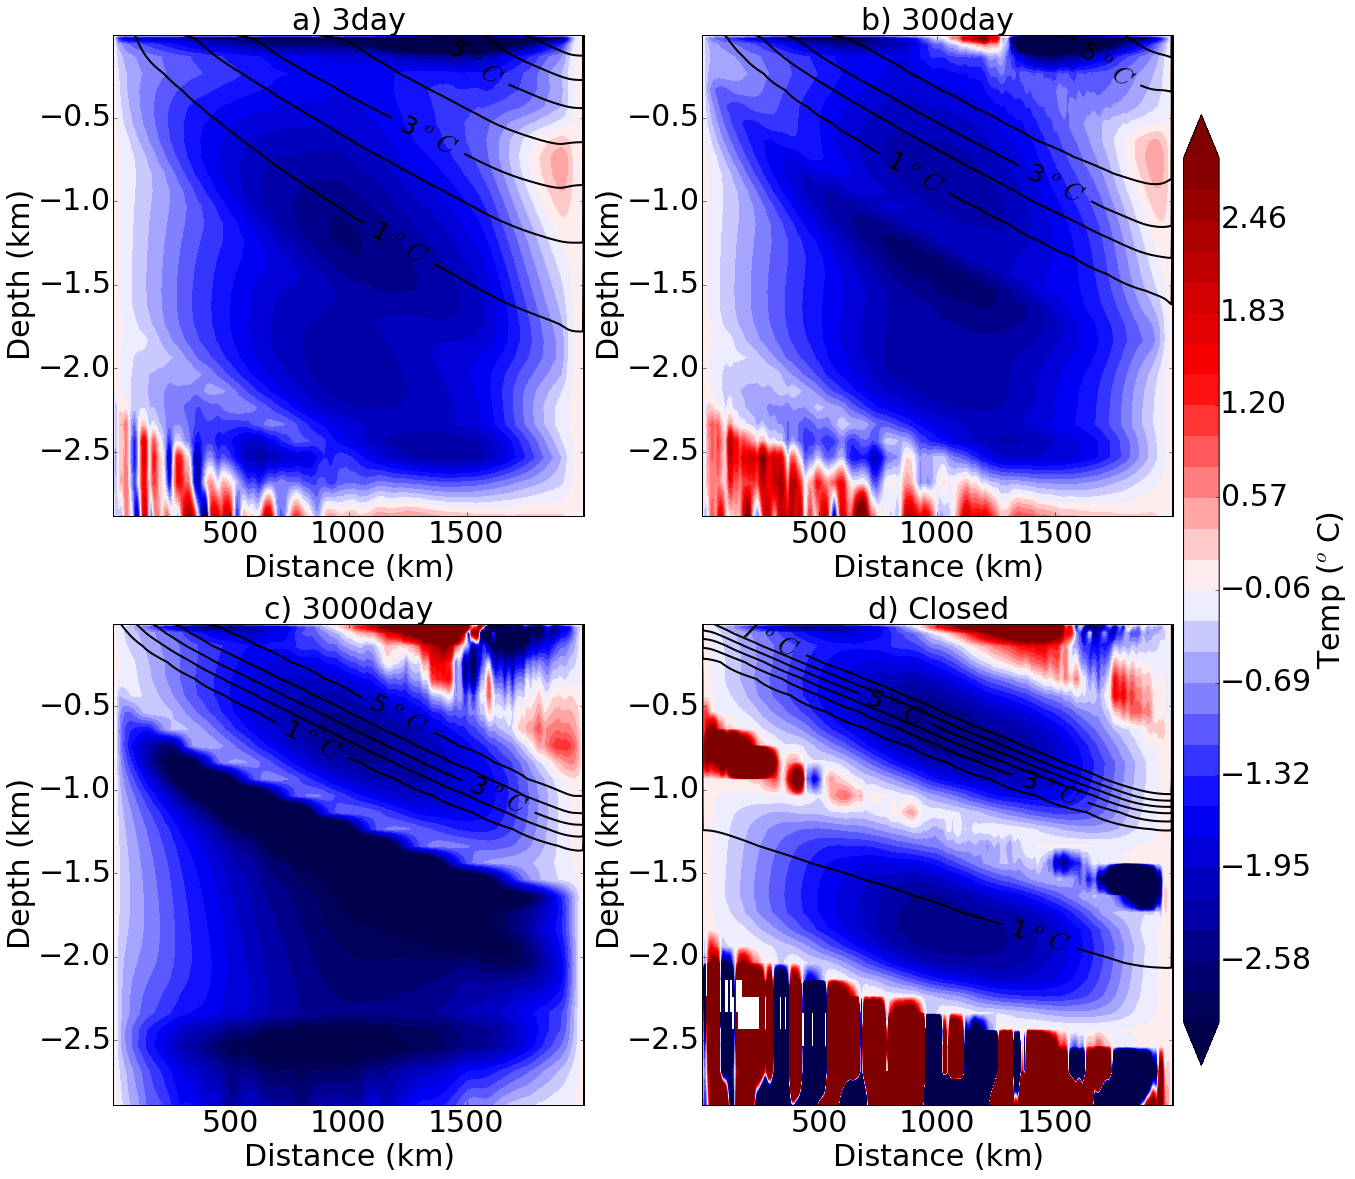

In [19]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)

Q_levs = (arange(-0.00002,0.00015,0.00001))/10
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    A = (c.ddy_cgrid_centered(VpTp*S)*tile(c.dzf,(c.Ny,1)).T)
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz
    #VpTp[VpTp>-.00005]= -.00005
    E =  VpTp / Tz
    Kb = - VpTp / Ty
    bfac = 9.8*2e-4
    #S[S>0.004]=np.nan
    #S[S<-0.004]=np.nan
    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,  E, Psi_levs, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"Temp ($^o$C)", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

The algorithm is as follows:                                                                                                                                                                                             \begin{equation}
\theta^{(n+1/3)} = \theta^{(n)}- \Delta t \partial_x (u\theta^{(n)}) + \theta^{(n)} \partial_x u
\end{equation}
\begin{equation}
\theta^{(n+2/3)} = \theta^{(n+1/3)} - \Delta t \partial_y (v\theta^{(n+1/3)}) + \theta^{(n)} \partial_y v
\end{equation}
\begin{equation}
\theta^{(n+3/3)} = \theta^{(n+2/3)}- \Delta t \partial_r (w\theta^{(n+2/3)}) + \theta^{(n)} \partial_r w
\end{equation}
\begin{equation}
G_\theta = ( \theta^{(n+3/3)} - \theta^{(n)} )/\Delta t
\end{equation}              

C !DESCRIPTION:                                                                                                      
Calculates the meridional gradient of a tracer: $\partial_y \theta = \frac{1}{\Delta y_c} \delta_j \theta$                                                                             and multiplies by the area

C !DESCRIPTION:                                                                                                      
Calculates the area integrated meridional flux due to down-gradient diffusion of a tracer:                          \begin{equation*}
F^y_{diff} = - A^y \kappa_h \frac{1}{\Delta y_c} \delta_j \theta 
\end{equation*}        